# Линейные модели ML

Линейные модели классификации и регрессии играют большую роль в классическом ML. Как мы убедимся, линейные модели просты в использовании и обучении, поддаются частичной интерпретации и имеют много интересных модифицкаций. В будущем мы узнаем, что нейронные сети являются, в некотором роде, развитием линейных моделей и их существенным усложнением.

Линейные модели классификации и регрессии заметно отличаются друг от друга, по этой причине мы рассмотрим их отдельно друг от друга. Первая часть лекции будет посвящена линейным моделям классификации, а вторая - линейным моделям регрессии.

## Линейные модели классификации

Далее нам потребуется вспомнить некоторые основные понятия из курса математики. Кратко они будут описаны в данном разделе. Более подробно можно почитать в [дополнительных материалах](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G?hl=ru#scrollTo=OXZed9NEynaD).


Нам потребуются следующие понятия:
1. [Векторы и операции над ними](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=gA45eUPC45b_).
2. [Скалярное произведение двух векторов](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=OXZed9NEynaD).
3. [Уравнение прямой на плоскости, гиперплоскость](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1qeoxXvxWgZm).
4. [Элементы математической статистики](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=yPmqiNmzddfC): математическое ожидание, дисперсия, стандартное отклонение.





### Обобщённый линейный классификатор

Идея обобщенного линейного классификатора состоит в том, что в качестве таких границ мы будем брать некоторые линейные поверхности, или, как их еще называют, [**гиперплоскости**](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1qeoxXvxWgZm).

Напомню, что линейными называются такие поверхности, которые могут быть заданы в виде линейного уравнения. В простейшем случае это просто прямая: $$y = kx + b $$ Или, как то же уравнение записали бы математики: $$Ax + By + C = 0$$
Почему я сказал, что этот случай простейший? Все дело в том, что переменных здесь у нас всего 2, то есть мы работаем на плоскости. Но то же уравнение может быть записано и для большего числа переменных: 3, 4 и вообще сколько нам захочется. В общем виде оно будет выглядеть так: $$w_1{x_1} + w_2{x_2} + w_3{x_3} + ... + w_N{x_N} + {w_0} = 0$$

Множество тех точек $x$, для которых это уравнение выполнено, можно нарисовать в $N$-мерной плоскости, и оно задаст нам некоторую поверхность. Сказать, что это конкретно будет за поверхность, мы сможем только подобрав коэффициенты ${w_0}, {w_1} ... {w_N}$.

В двумерном случае эта поверхность будет некоторой прямой, в трехмерном - плоскостью, более высокие размерности людям очень сложно себе представить. Именно поэтому мы с вами будем брать в качестве иллюстрации именно двумерный случай.

В двумерном случае логика действительно простая:
одно множество точек от другого можно отделить при помощи прямой. Но прямые бывают разные, какие-то будут справляться с этой задачей лучше, чем другие. Наша цель - как раз отыскать **самую лучшую** прямую.



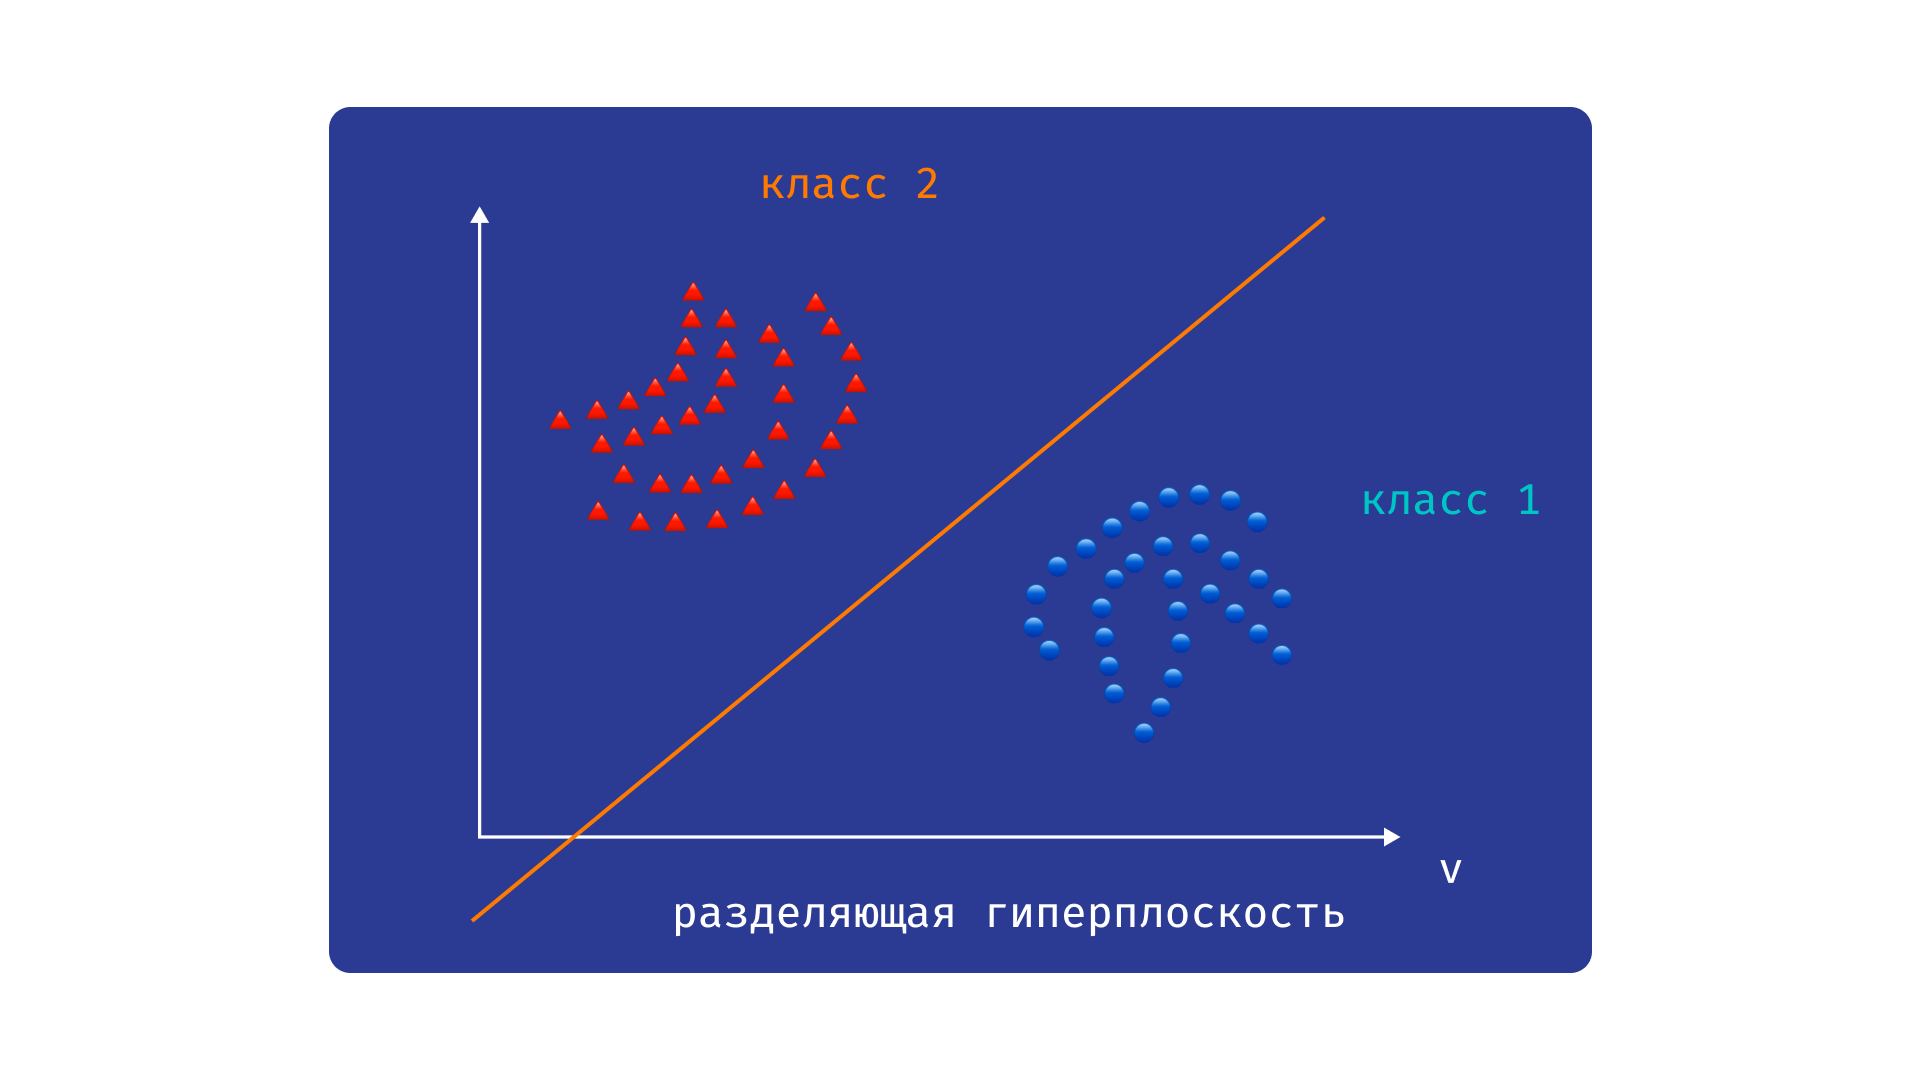

Что значит самую лучшую?
И как формально поставить эту задачу?

Приготовьтесь, сейчас будет математика!

I. Думаю, многие из вас помнят со школы или первого курса, что такое [скалярное произведение](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=OXZed9NEynaD). Математики, программисты и физики знают про этот объект очень много интересного :)

Давайте напомню: если у нас с вами есть два [вектора](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=pcSZI4RdFton) $$\vec{x} = (x_1, ... , x_N) \in R^N$$ $$\vec{y} = (y_1, ... , y_N) \in R^N$$ то их (евклидовым) скалярным произведением называется $(\vec{x},\vec{y}) = x_{1}y_{1} + x_{2}y_{2} + ... + x_{N}y_{N} = ∑x_{i}y_{i}$.

Тогда уравнение прямой на плоскости можно записать в виде $w_1{x_1} + w_2{x_2} + w_0 = 0$ (если заменить $x$ на $x_1$, а $y$ на $x_2$ в формуле прямой на плоскости $y = kx + b $).

Или, что то же самое, $$(\vec{w},\vec{x}) + {w_0} = 0$$

Вектор $\vec{w}$ называют вектором **параметров нашей модели**, а иногда - **вектором весов**.
Именно он и задаёт конкретную прямую, которую мы будем использовать для отделения одного класса от другого. То есть выбрать конкретную прямую значит выбрать **конкретный вектор параметров $\vec{w}$ и значение $w_0$**. Наша задача состоит ровно в том, чтобы найти эти $\vec{w}$ и $w_0$

II. Вспомним интересную деталь, связанную с уравнением прямой: пусть прямая задается уравнением $f_w(x) = (\vec{w},x) + {w_0} = 0$. Тогда знак функции $f_w$ будет меняться следующим образом:

1) Если $x'$ лежит на прямой, $f_w$($x'$) = 0

2) Если $x''$ лежит по одну сторону от прямой (условно - справа), то  $f_w$($x''$) > 0

3) Если $x'''$ лежит по другую сторону от прямой (условно - слева), то $f_w$($x'''$) < 0

То есть нам не обязательно смотреть глазами на построенную прямую, можно вообще отвлечься от факта, что наша модель - прямая. Просто теперь мы имеем вполне определенный алгоритм классификации:

Если точка x лежит слева от прямой, то $f_w$($x''$) < 0 - отнесем ее к классу 0.
А если точка x лежит справа от прямой, то $f_w$($x''$) > 0 - отнесем ее к классу 1.

Последняя проблема, которая стоит перед нами, - это поиск самого лучшего набора параметров для классификации имеющегося датасета.


**Замечание**:

Сейчас мы обсуждаем модельный пример задачи, когда существует такая гиперплоскость, способная разделить нашу [выборку](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=yPmqiNmzddfC) на 2 класса. Вообще-то существование такой гиперплоскости нам никто не обещает. Выборки, для которых такая гиперплоскость существует, называются **линейно разделимыми**.

Если выборка не является линейно разделимой, линейный классификатор не даст идеальный результат, но может дать достаточно хороший.

### Проблема оптимизации

Из каких соображений искать этот вектор параметров?

Прежде чем ответить на этот вопрос, сделаем еще пару интересных наблюдений:

- Несложно придумать функцию, которая будет показывать ошибку нашей модели:
$$ M(f_w, x, y) = [f_w(x) = y] $$
Такая функция называется индикатором, и она возвращает 0, когда условие в квадратных скобках не выполнено, и 1, когда выполнено.

- Но уже сложнее оценить, насколько сильно ошиблась наша модель. Ведь случай, когда прямая прошла очень далеко от анализируемой точки, отправив ее в неправильный класс, очень отличается от случая, когда она прошла совсем близко к этой точке. Нам бы хотелось отдавать предпочтения тем моделям, которые делают **уверенные** предсказания, если они верны, и **неуверенные**, если они неверны.

Представьте, что Вы - учитель, и Вы задаете ученикам сложный вопрос. Один из учеников сразу дал неправильный ответ с уверенным видом, второй же - тоже дал неправильный ответ, но пытался размышлять и сомневался в своем неверном ответе. Вы же отдадите предпочтение второму, даже несмотря на то, что оба дали неверный ответ на вопрос.

То есть нам недостаточно иметь оценку ошибки лишь в виде ее индикатора. Нам хочется понять, насколько сильно наша модель заблуждается в своих решениях.

- Для этого мы воспользуемся следующей идеей:
 геометрически уверенность модели можно трактовать как расстояние от точки до прямой, которую мы используем для классификации. Если точка далеко от прямой - уверенность модели высока, а если близко - модель неуверенна. Как же оценить это расстояние?

 Оказывается, при помощи все той же функции $f_w(x)$! Ее знак показывает положение точки относительно прямой, но ее модуль - показывает, как далеко эта точка от прямой находится.

 - Пусть метки классов, с которыми мы работаем, задаются именно в виде +1 и -1. Тогда выражение $M_i(\vec{w}, w_0) = f_w(x_i)*y_i$ будет положительным тогда и только тогда, когда классификация верна, а его модуль покажет нам уверенность модели!

 Разберемся подробнее:
 * Пусть $y_i$ = +1. Тогда модель сделала верное предсказание, если $f_w(x_i) > 0$, а неверное, если - $f_w(x_i) < 0$. Тогда, умножив, $y_i$ на $f_w(x_i)$ мы получим положительное число, только если $f_w(x_i) > 0$, то есть классификация верная. Полученное значение же будет пропорционально уверенности модели в своей верной классификации, как мы выяснили в предыдущем пункте.

* И наоборот: Пусть $y_i$ = -1. Тогда модель сделала верное предсказание, если $f_w(x_i) < 0$, а неверное, если - $f_w(x_i) > 0$. Умножение на $y_i = -1$ даст нам положительный результат в случае верной классификации и отрицательный - в случае неверной. Само же значение опять показывает уверенность модели в своем ответе.

Значит, мы хотим, чтобы $M_i(w, w_0)$ был как можно больше!
Эта функция называется **отступом**. И наша задача - максимизировать средний отступ по всему нашему датасету!

Именно исходя из этого соображения мы должны подбирать параметры модели. Таким образом, мы свели задачу бинарной классификации к задаче оптимизации, то есть поиска минимума или максимума некоторой функции. О том, как решаюся такие задачи в машинном обучении, мы поговорим в конце этой лекции.



Мы рассмотрим два специальных типа такого подхода.

# SVM (support vectors machine, метод опорных векторов)

Мы можем требовать от наших гиперплоскостей некоторых дополнительных свойств. Скажем, мы хотим, чтобы классификация была как можно более уверенной. Это значит, что минимальное [расстояние](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=BQYo5PC3B_jZ) между объектом каждого из классов и проведенной гиперплоскостью должно быть как можно больше, ведь, как мы выяснили, именно это расстояние является формальным эквивалентом "уверенности". Представим себе полосу, ограниченную двумя гиперплоскостями, параллельными разделяющей гиперплоскости, отвечающую двум требованиям:

- Внутрь этой полосы не попало ни одного объекта (предположим для начала, что выборка линейно разделима, тогда это возможно).

- Границы этой полосы настолько близки к объектам обоих классов, насколько это только возможно (то есть если мы совсем немного увеличим ширину этой полосы, какой-то объект обязательно попадёт внутрь).

- Построенная разделяющая гиперплоскость находится ровно в середине этой полосы.

Приведённый рисунок иллюстрирует данную модель.

В нашем случае требование максимальной уверенности классификации значит, что мы хотим построить такую прямую, чтобы **ширина полосы, отделяющей один класс от другого была максимально возможной**.



Это абсолютно естественное требование, ведь мы хотим, чтобы минимальный отступ, который мы рассматривали в прошлом параграфе, то есть расстояние от разделяющей гиперплоскости до ближайшего объекта из выборки, был как можно больше - в этом случае классификация будет наиболее уверенной.
Это требование можно записать в виде математической постановки задачи оптимизации. Эта постановка в виде системы уравнений и неравенств достаточно громоздкая, ее изучение лежит за пределами нашего курса.

Перейдем сразу к рассмотрению решения этой проблемы.

В результате решения задачи квадратического программирования мы имеем набор коэффициентов $λ_i$ и решающее правило:
$$a(x) = sign\big[∑\lambda_iy_i(x_i,x) - ∑λ_iy_i(x_i,x_j) - y_i\big]$$

(Где $j$ - это индекс объекта, для которого $λ_j$>0 и $M_j$=1).
В данном случае ${x_i}$ - это $i$-й объект из нашей выборки, ${y_i}$ - это метка этого объекта, а $λ_i$ - набор коэффициентов, полученных при аналитическом решении задачи оптимизации. Функция $y=sign(x)$ - [функция знака](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=ryutVBXiDzx3) (signum).

Именно такой классификатор при условии верно подобранного набора чисел $λ_i$ дает нам нужное решающее правило, максимизирующее ширину полосы.

Для максимизации ширины полосы нам, по факту, не нужно знать никакой информации об объектах, лежащих от этой полосы очень уж далеко. Одним словом нам нужно что-то знать лишь про те объекты, которые лежат **на границе** этой самой оптимальной полосы. Формально это значит, что многие коэффициенты $λ_j$ буду равны нулю, и лишь некоторые из них, привязанные к объектам, лежащим на границе полосы, будут отличны от нуля. Такие объекты как раз и называются **опорными векторами**.

Сложно?
Ничего, рассмотрим работу этого алгоритма на примере.



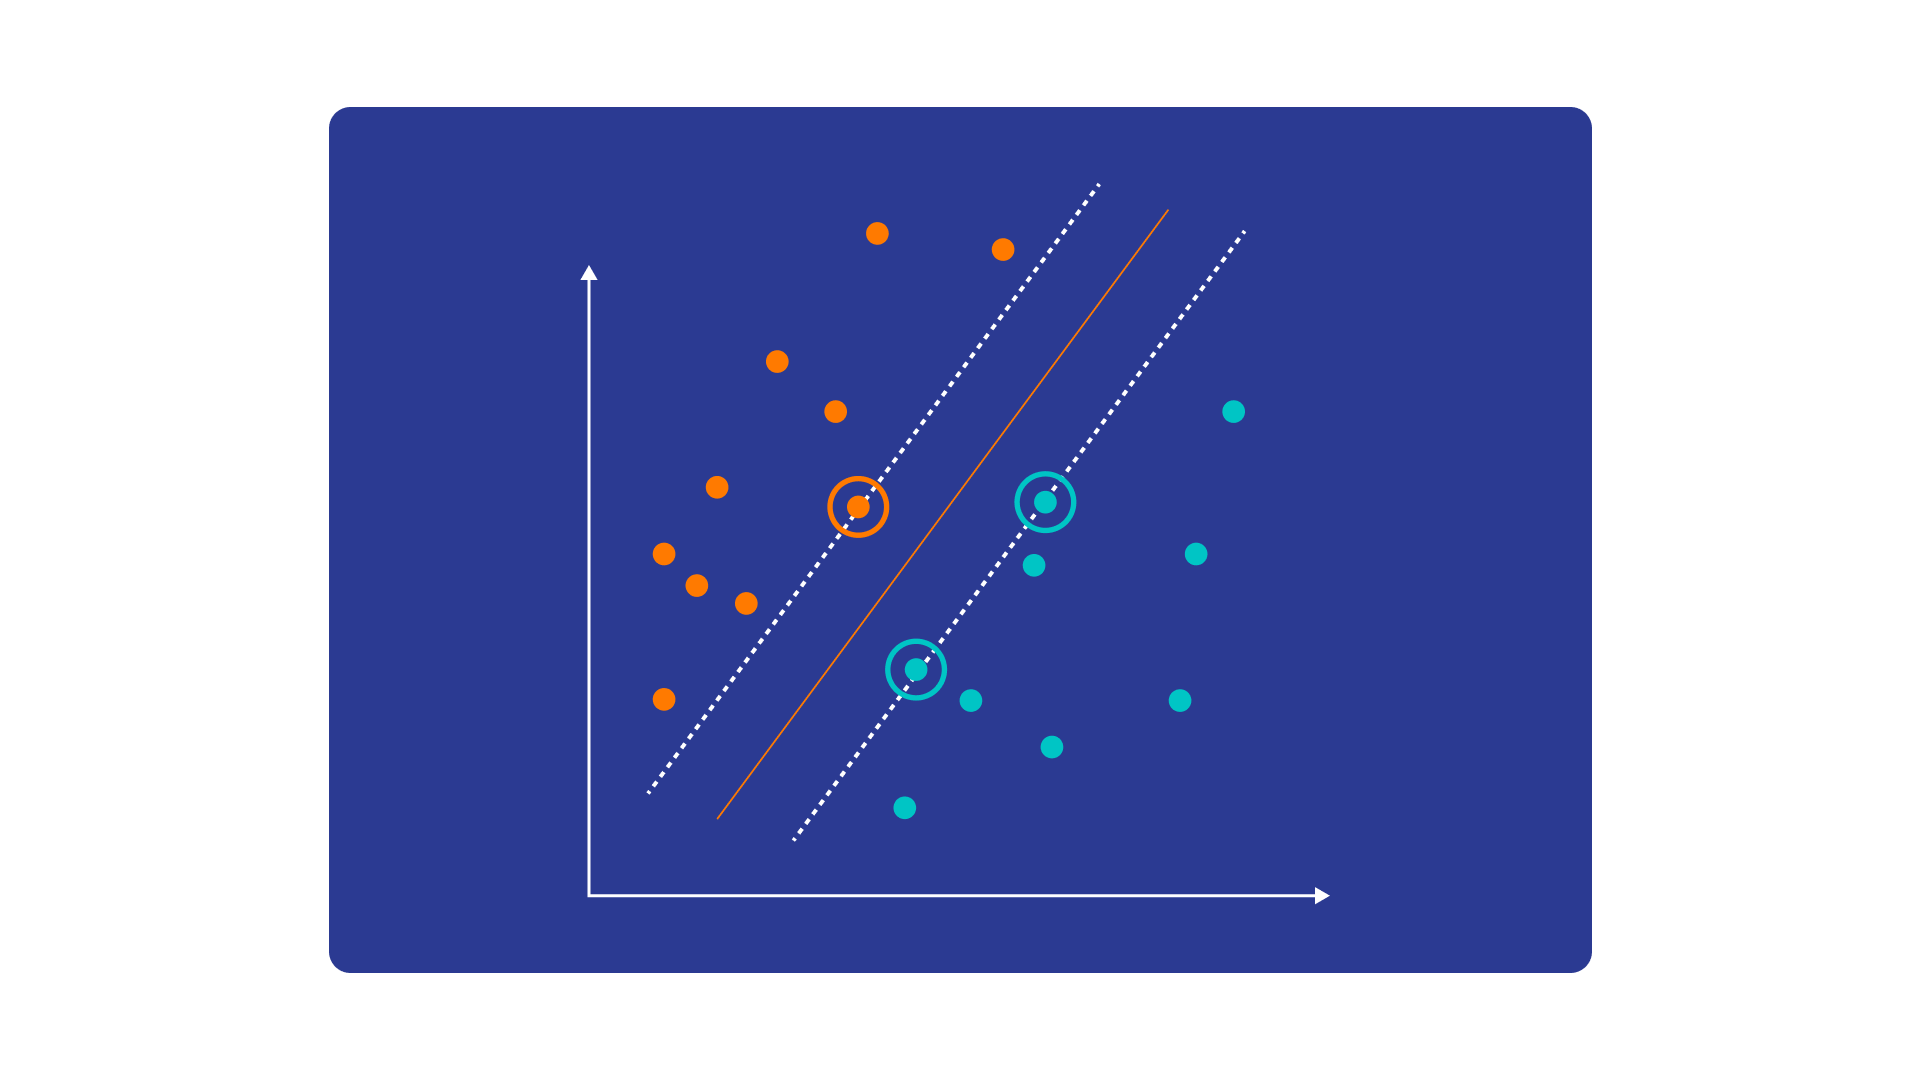

In [8]:
"""
Рассмотрим датасет, содержащий набор новостных статей из категорий 'атеизм' и 'космос'
"""

# Импортируем необходимые библиотеки
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import numpy as np

# Загрузим датасет
newsgroups_data = fetch_20newsgroups(
    subset='all',
    categories=['alt.atheism', 'sci.space']
)


In [9]:
print(newsgroups_data.data[0])

From: 9051467f@levels.unisa.edu.au (The Desert Brat)
Subject: Re: Keith Schneider - Stealth Poster?
Organization: Cured, discharged
Lines: 24

In article <1pa0f4INNpit@gap.caltech.edu>, keith@cco.caltech.edu (Keith Allan Schneider) writes:

> But really, are you threatened by the motto, or by the people that use it?

Every time somone writes something and says it is merely describing the norm,
it is infact re-inforcing that norm upon those programmed not to think for
themselves. The motto is dangerous in itself, it tells the world that every
*true* American is god-fearing, and puts down those who do not fear gods. It
doesn't need anyone to make it dangerous, it does a good job itself by just
existing on your currency.

> keith

The Desert Brat
-- 
John J McVey, Elc&Eltnc Eng, Whyalla, Uni S Australia,    ________
9051467f@levels.unisa.edu.au      T.S.A.K.C.            \/Darwin o\
For replies, mail to whjjm@wh.whyalla.unisa.edu.au      /\________/
Disclaimer: Unisa hates my opinions.   

Задача состоит в том, чтобы классифицировать статью, отнеся ее к одной из этих категорий. Возникает один вопрос - как нам представить текст в виде вектора? Ведь именно вектор, состоящий из некоторого количества вещественных чисел мы должны передать нашему алгоритму. Рассмотрим один из вариантов векторизации текстов.

### ONE HOT и TF-IDF

TF-IDF - один из известных методов векторизации текстов, основанный на методе векторизации слов (и любых категориальных признаков), называемом one-hot encoding.



Его идея состоит в том, что каждое слово из имеющихся в нашем распоряжении, можно представить в виде вектора вида

$$[0...0 1 0...0]$$

 где $1$ стоит на единственном месте, отвечающем порядковому номеру этого слова в словаре.

То есть в простейшем случае каждому слову сопоставляется вектор указанного выше вида. Такой подход называется One-Hot-энкодингом.







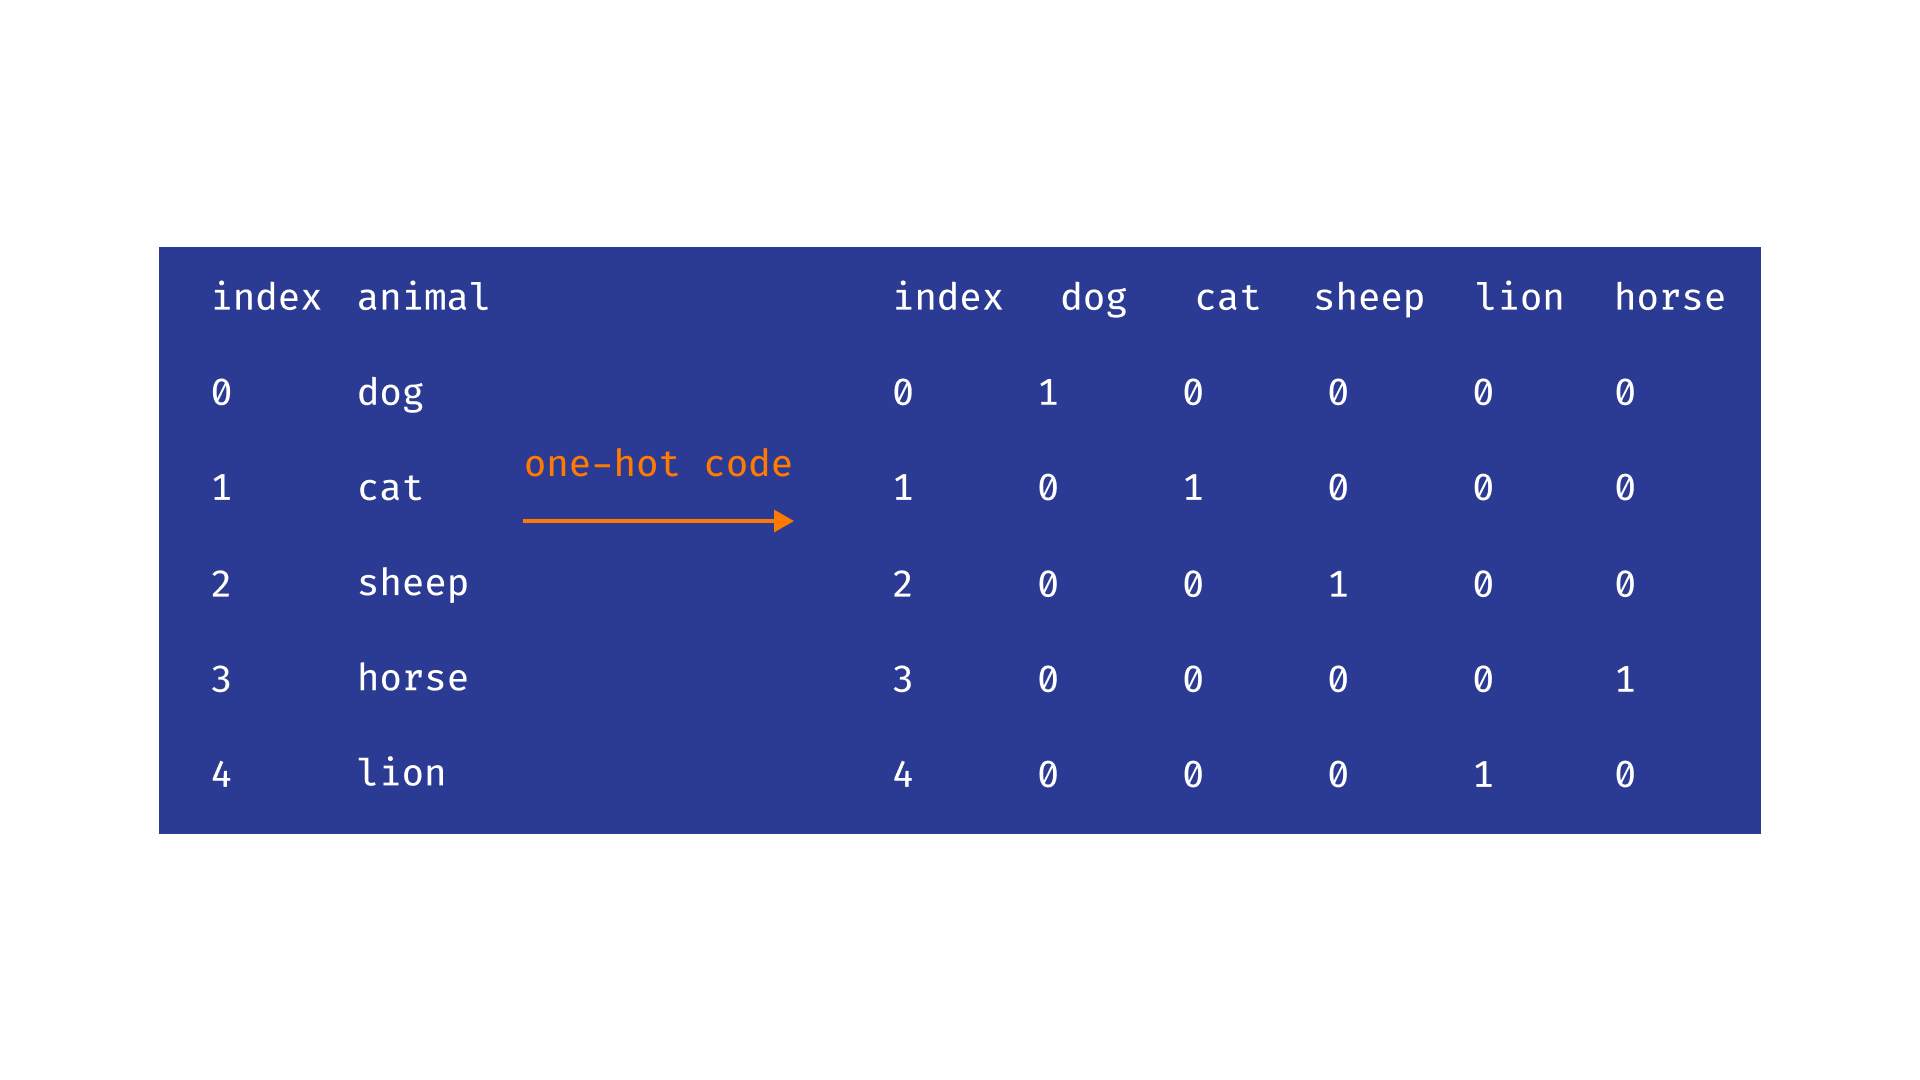

Рассмотрим one-hot encoding на примере реализации sklearn. Этот метод реализован в рамках класса `sklearn.preprocessing.OneHotEncoder`.

In [10]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Создание словаря для OneHotEncoder
vocabulary = np.array(['I', 'love', 'cats'])

# Инициализация и .fit OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoder.fit(vocabulary.reshape(-1, 1))

OneHotEncoder(handle_unknown='ignore')

Вектор целого текста можно получить из векторов слов, входящих в него, при помощи простого сложения этих векторов. Такой способ векторизации текстов называется мешком слов (Bag Of Words).

TF-IDF - это небольшая модификация идеи Bag Of Words, которая говорит, что векторы слов стоит складывать не просто так, а с некоторым коэффициентом важности. Эта важность слова для характеристики текста определяется исходя из двух соображений:

- Чем чаще слово встречается во всех известных нам текстах, тем менее оно индивидуально и в меньшей степени важно для характеристики именно конкретного нашего текста, и тем меньше должен быть его вес.
- Чем чаще слово встречается именно в нашем тексте, тем сильнее оно характеризует текст, и тем больше должен быть его вес.

На основе этих идей формируется вес каждого слова в тексте, а затем векторы слов складываются именно с этими весами.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Преобразование данных новостных групп в TF-IDF представление
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(newsgroups_data.data)
y_target = newsgroups_data.target

# Инициализация классификатора SVM с линейным ядром (ядрам посвящена следующая лекция)
svm_classifier = SVC(C=1.0, random_state=241, kernel='linear')

# Обучение классификатора
svm_classifier.fit(X_tfidf, y_target)

SVC(kernel='linear', random_state=241)

Обратите внимание: при инициализации Support Vectors Classifier (**SVC**) в аргумент конструктора мы передаём значение параметра `C=1.0`

C - это один из важных гиперпараметров SVM, который называется параметром регуляризации. Мы с вами теоретически рассмотрели лишь случай линейно разделимой [выборки](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=yPmqiNmzddfC), но совсем не все выборки такие. Это не значит, что построить SVM невозможно, просто придется смириться с тем, что некоторое количество ошибок нашим алгоритмом всё же будет допущено. Параметр C в данном случае - это степень "наказания" алгоритма за неизбежно допущенную ошибку.

Также мы используем значение аргумента `kernel='linear'`. Подробнее об этом аргументе и ядрах вообще мы поговорим на следующей лекции.

Слишком большое значение коэффициента C может привести к тому, что алгоритм слишком сильно адаптируется под конкретную выборку, под шумы и выбросы, присутствующие в них, а слишком низкое - к тому, что алгоритм не выучит искомую зависимость в данных.

In [12]:
# Получение списка признаков (слов) из TF-IDF векторайзера
feature_names = tfidf_vectorizer.get_feature_names_out()

# Определение наиболее важных по модулю коэффициентов классификатора (топ-10)
# Коэффициенты модели, содержащиеся в поле coef_
coefficients = np.asarray(svm_classifier.coef_.todense()).reshape(-1)
# Модуль коэффициентов
abs_coefficients = np.abs(coefficients)
# Индексы топ-10 коэффициентов
top_indices = np.argsort(abs_coefficients)[-10:]

print(top_indices)

[22936 15606  5776 21850 23673 17802  5093  5088 12871 24019]


In [13]:
# Нам мало, что говорят индексы элементов. Посмотрим на то, какие слова непосредственно отвечают этим индексам
np.array(feature_names)[top_indices]

array(['sci', 'keith', 'bible', 'religion', 'sky', 'moon', 'atheists',
       'atheism', 'god', 'space'], dtype=object)

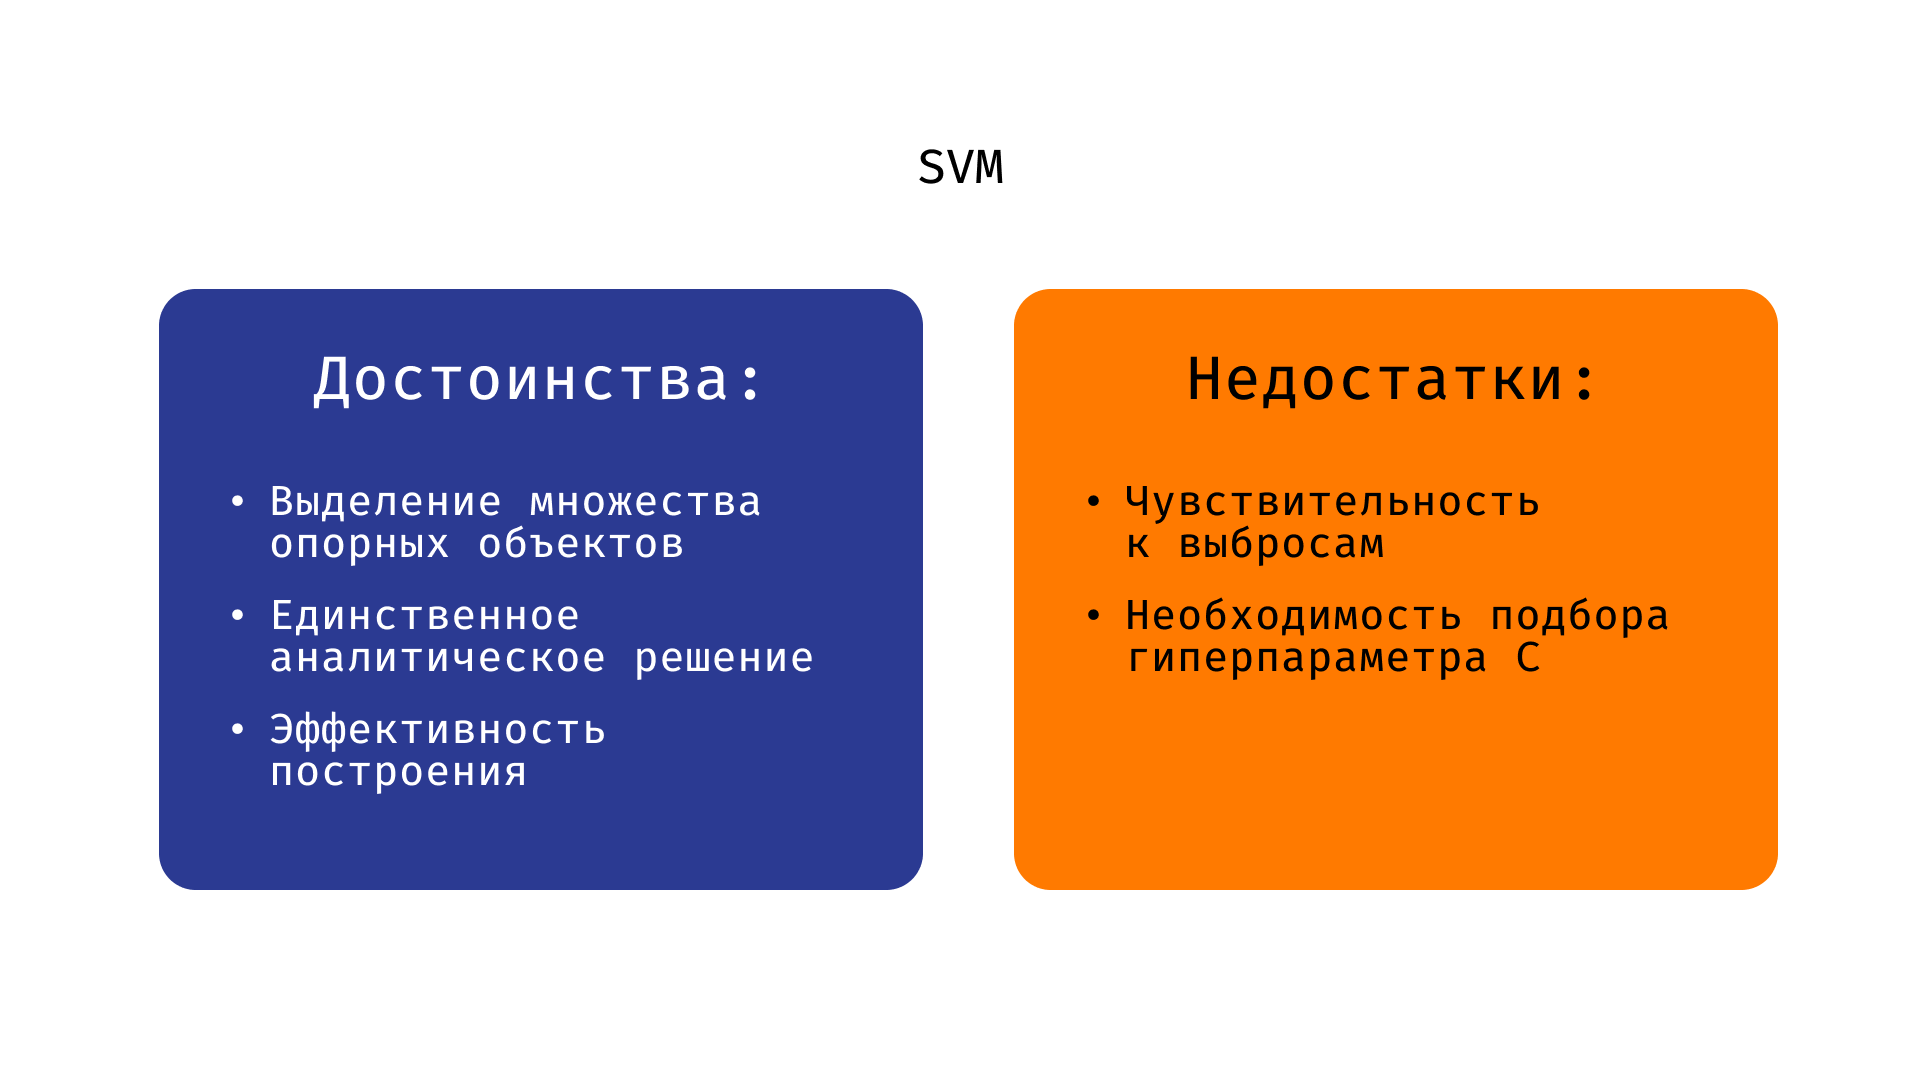

## Логистическая регрессия

Мы можем также потребовать другое интересное свойство: пусть наш алгоритм возвращает не просто номер класса, а **вероятность принадлежности объекта** тому или иному классу. Тогда мы получаем алгоритм, который носит название логистической регрессии.

Идея состоит в том, что наш классификатор должен теперь выдавать не строгие ответы 1/0, а лишь **вероятность** принадлежности объекта классу 1, при этом оставаясь линейным классификатором.

Такой способ классификации называется **мягкой классификацией**, то есть классификацией, при которой алгоритм возвращает степень принадлежности объекта одному из классов. Альтернативный более привычный нам способ классификации - **жёсткая классификация**, при которой алгоритм однозначно возвращает нам один из классов.

Для того чтобы сделать это, мы воспользуемся очень известной функцией, которую обычно называют [сигмоидой](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=v2VSpP-GGtSq):

$$σ(x) = \frac{1}{1 + e^{-x}}$$


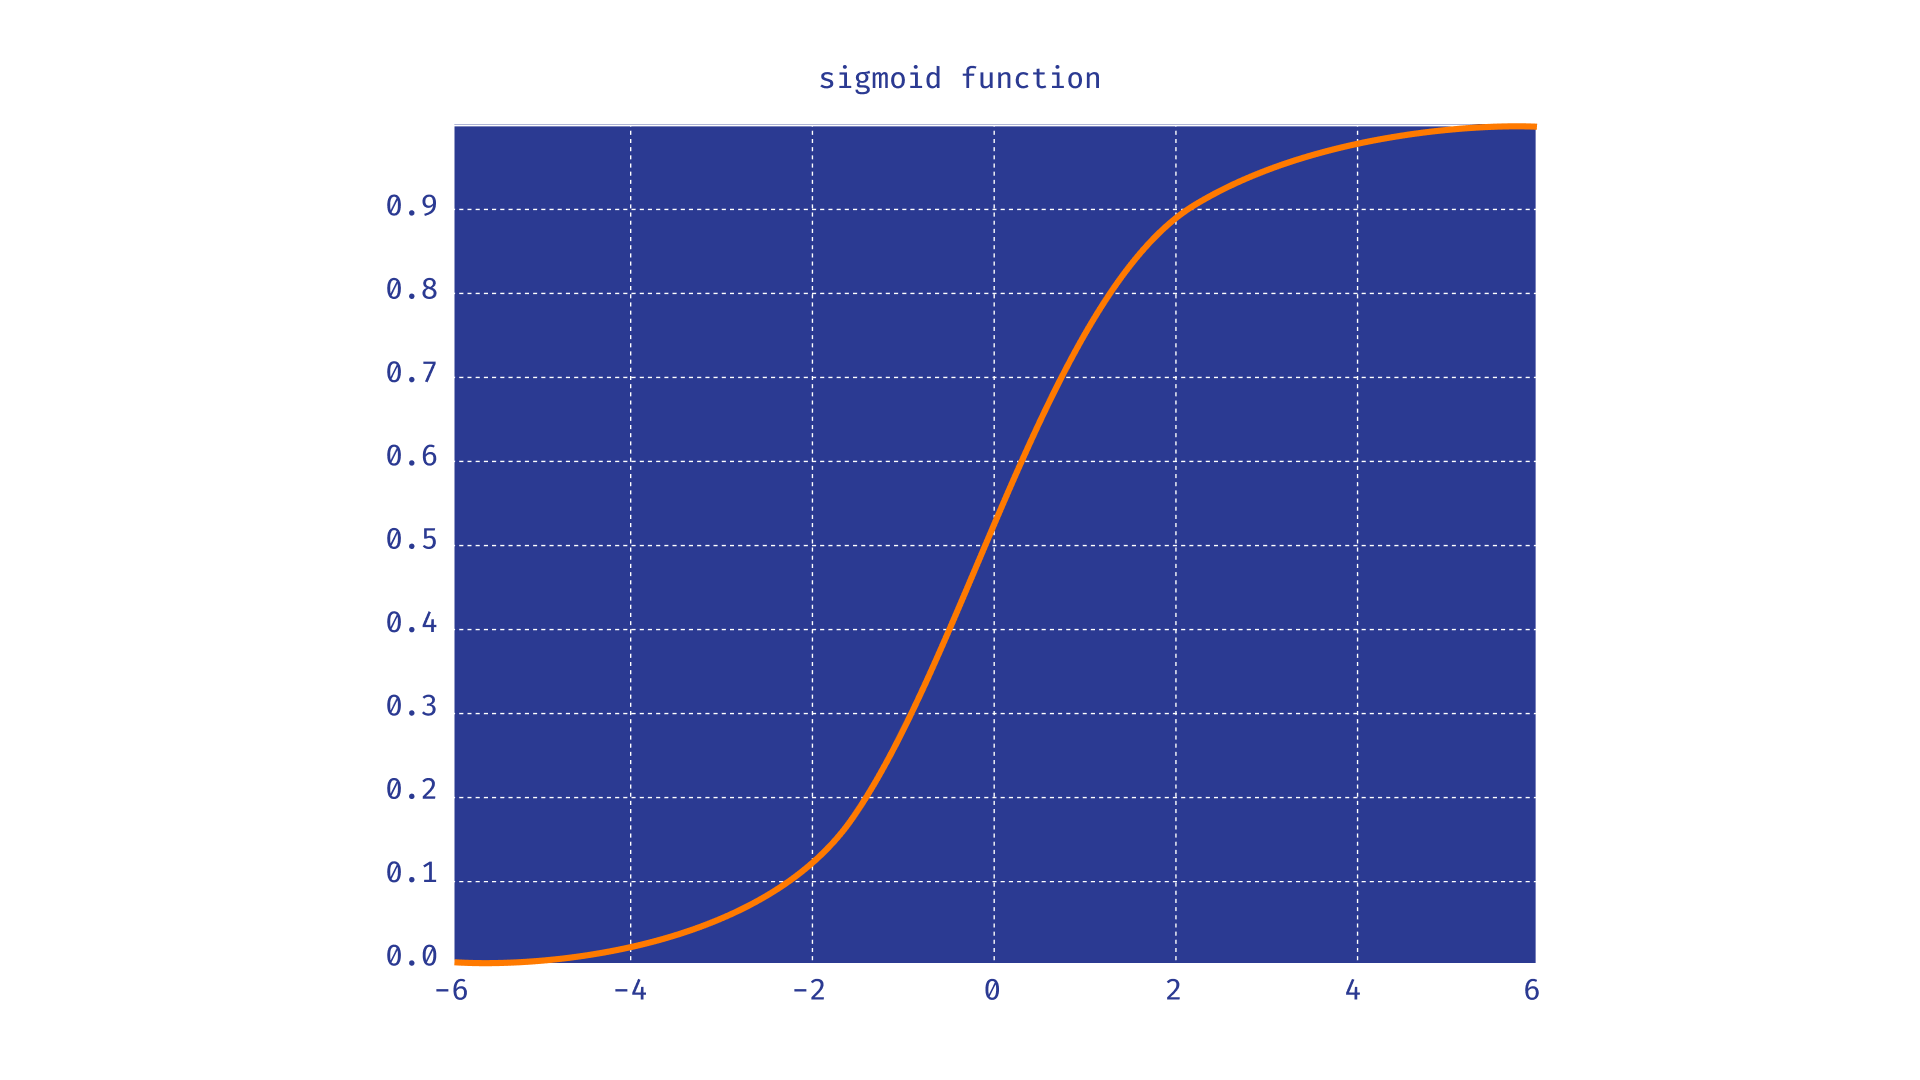



Сигмоида обладает рядом **полезных свойств**:

> 1. Значения сигмоиды, как нетрудно убедиться, лежат в диапазоне от 0 до 1
> 2. Ось Y график сигмоиды пересекает в точке 0.5
> 3. Функция стремится к 1 на бесконечности и к 0 - на минус бесконечности

Пусть алгоритм будет следующим:

Вместо обычного вычисления функции $(w,x) + w_0$, по знаку которой мы делаем вывод о принадлежности к классу 0 или классу 1, мы применим к полученному значению функцию сигмоиды.

То есть
$$a(x) = σ((w,x) + w_0)$$

Обратим внимание вот на что:

- Когда наш классификатор принял решение отнести объект к классу 1, $(w,x) + w_0 > 0$, то есть $σ((w,x) + w_0) > 0.5$, а когда объект отнесен к классу 0 - $σ((w,x) + w_0) < 0.5$. То есть 0.5 для нас теперь граница принятия решения
- Классификатор теперь выдает нам любое число от 0 до 1
- Чем больше отступ, то есть, чем увереннее модель, тем больше будет значение $a(x)$.

Все это дает нам повод воспринимать выход $a(x)$ именно как вероятность принадлежности объекта классу 1!
Когда эта вероятность больше 0.5 - мы относим объект к классу 1, но эта же ситуация соответствует случаю, когда и модель обычного линейного классификатора, дала нам значение класса 1. Аналогично с 0. При этом выполняются все свойства вероятности.

Простое навешивание сигмоиды помогло превратить нашу модель линейного классификатора в модель, возвращающую вероятности. Такая модель называется **логистической регрессией**



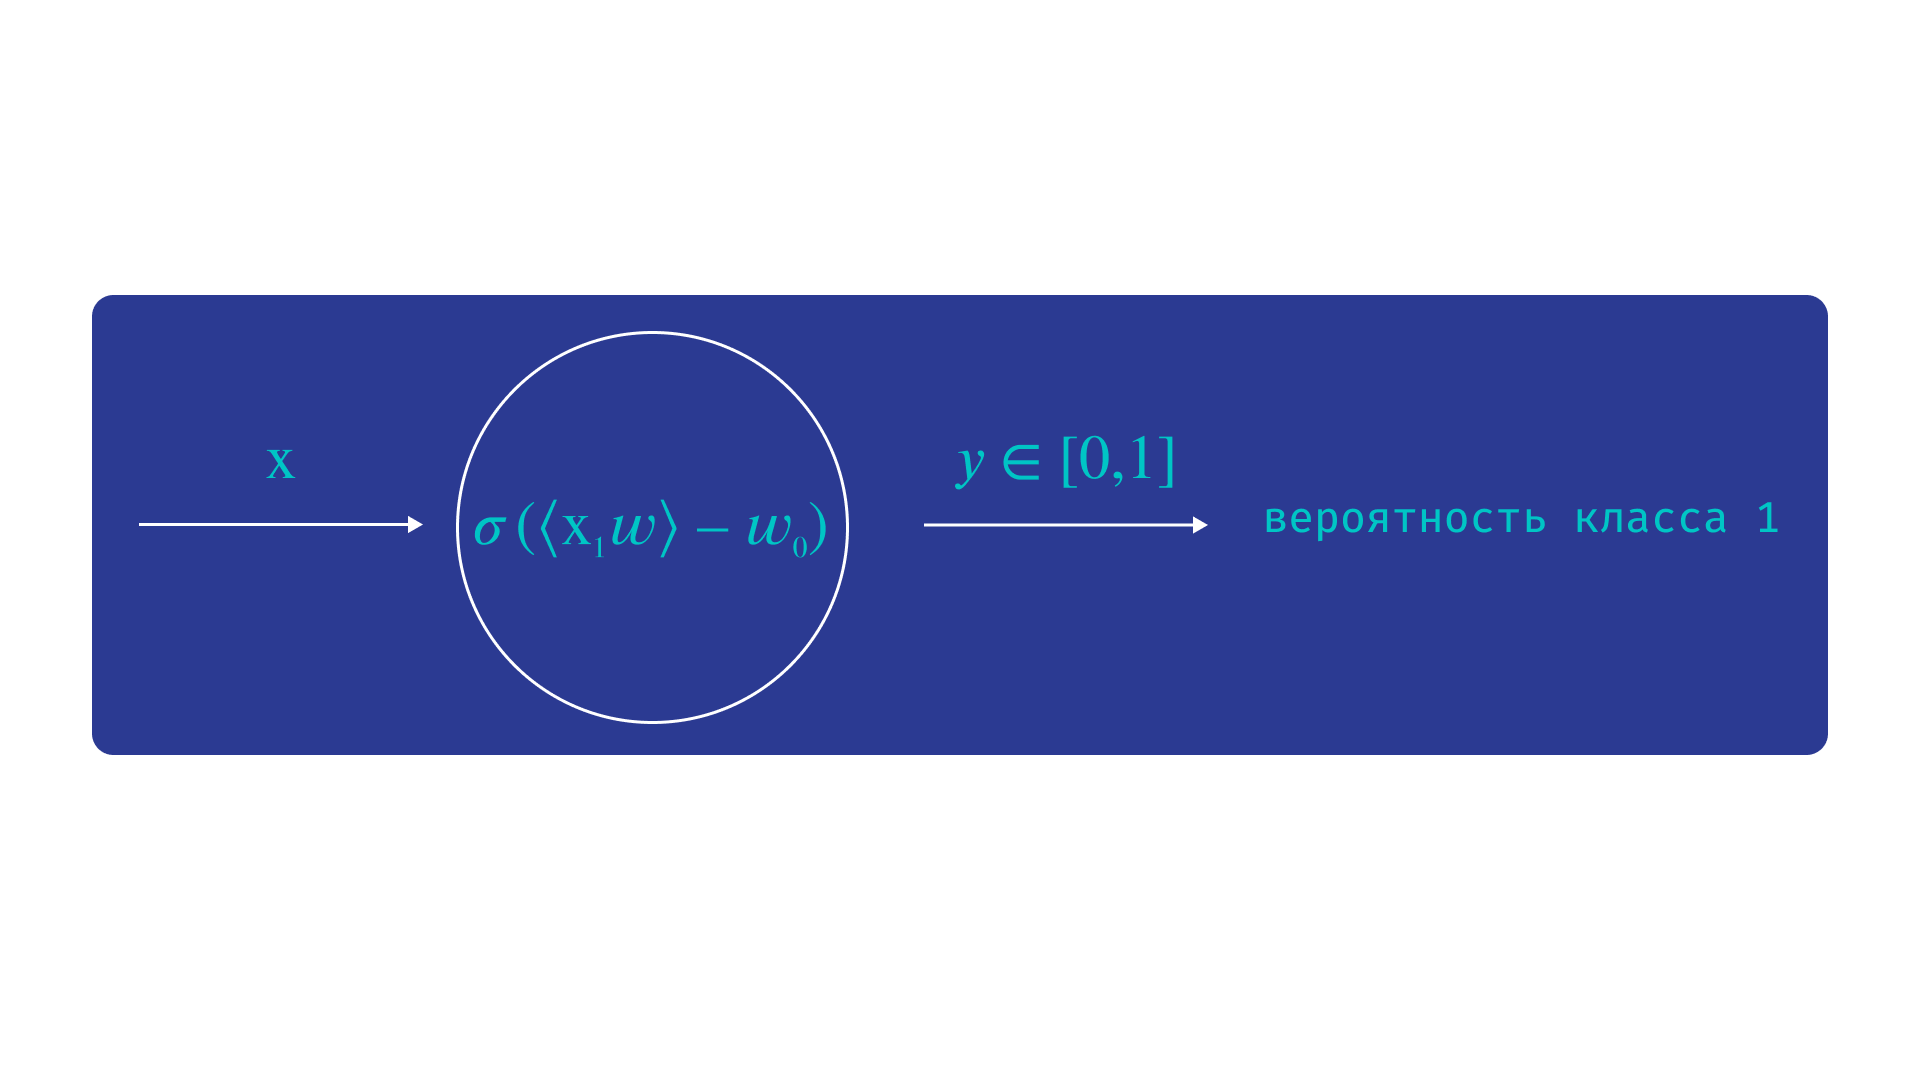

### Обучение модели

Для всех этих моделей нам необходимо подобрать оптимальный вектор параметров $\vec{w}$ (и ${w_0}$). В случае SVM мы упомянули, что этот вектор можно найти при помощи некоторой аналитической процедуры, в подробности которой мы вникать не стали. В случае логистической регрессии процедуры, позволяющей определить точный минимум функции ошибки, просто не существует.

________________________
**Напоминание.**
Функция ошибки (Loss-функция, функция потерь) - это функция, зависящая от параметров модели, показывающая насколько сильно эта модель ошибается.

Loss-функция зависит не столько от самой модели, сколько от задачи, которую мы решаем.

На прошлой лекции мы рассматривали задачу регрессии в контексте метрических методов и обсуждали, что эту задачу можно решать исходя из условия минимизации среднего квадрата ошибки предсказания модели. Это классический пример loss-функции.

В задаче бинарной классификации в качестве loss-функции обычно используется бинарная кросс-энтропия (Binary Cross-Entropy, BCE). Эта функция зависит от настоящих меток $y$ и предсказаний алгоритма $a(x) = p$, и выглядит следующим образом:

$$H(p, y) = - (y \cdot ln(p) +(1 - y) \cdot ln(1-p))$$

Эту функцию выбирают исходя из теоретико-информационных соображений.
________________________

Ясно, что задача обучения модели сводится к подбору таких параметров $\vec{w}$, которые доставляют минимум ожидаемой функции потерь, в математической записи $\vec{w} = argmin(Loss_{expected}(\vec{x}, \vec{w}))$. Значит, нам нужна какая-то процедура, позволяющая этот минимум найти даже тогда, когда не существует аналитических путей поиска этого минимума. Один из самых популярных алгоритмов такого рода - градиентный спуск.



### Градиентный спуск


Поиск минимума функции можно сравнить с хождением по горам.

Представьте себе, что вы - путешественник, идущий по горе и стремящийся спуститься вниз. В реальности вы будете выбирать свой путь исходя из обзора окружающей местности. Но в случае поиска минимума функции мы можем посчитать только характеристики функции в конкретной точке, поэтому правильной ассоциацией будет случай, когда прежде чем подняться на гору, вы завязали себе глаза. Вы знаете высоту, на которой находитесь, и чувствуете, какой наклон поверхности горы там, где вы находитесь.

Что вы будете делать в этом случае? С каждым шагом вы будете идти в ту сторону, куда наклон поверхности наиболее крутой.

Эту идею можно распространить на математическую модель поиска минимума. Из математического анализа известно, что если мы имеем функцию $F = F(x_1 ... x_n)$, то вектор [частных производных](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=aGVowH1ufYP_) этой функции (называемый градиентом), $$\vec{grad(F)} = \vec{∇F} = (\frac{\partial F(x_1)}{\partial x_1} ... \frac{\partial F(x_n)}{\partial x_n})$$

направлен в сторону **наискорейшего роста функции**. Вектор же **антиградиента**, соответственно, направлен в направлении наискорейшего убывания функции. Если мы хотим *шаг за шагом* приближаться к минимуму функции, мы должны каждый раз делать небольшой шажок в направлении антиградиента. Математически эту идею можно записать в виде следующей формулы: $$\vec{x_{n+1}} = \vec{x_n} - λ\vec{∇F(x)}$$ Где $λ$ характеризует размер нашего шага.

Применив эту идею для поиска минимума Loss-функции по параметрам нашей модели $\vec{w}$, мы найдем оптимальный (или почти оптимальный) вектор параметров модели, который и будем использовать при классификации. Запомним эту идею!


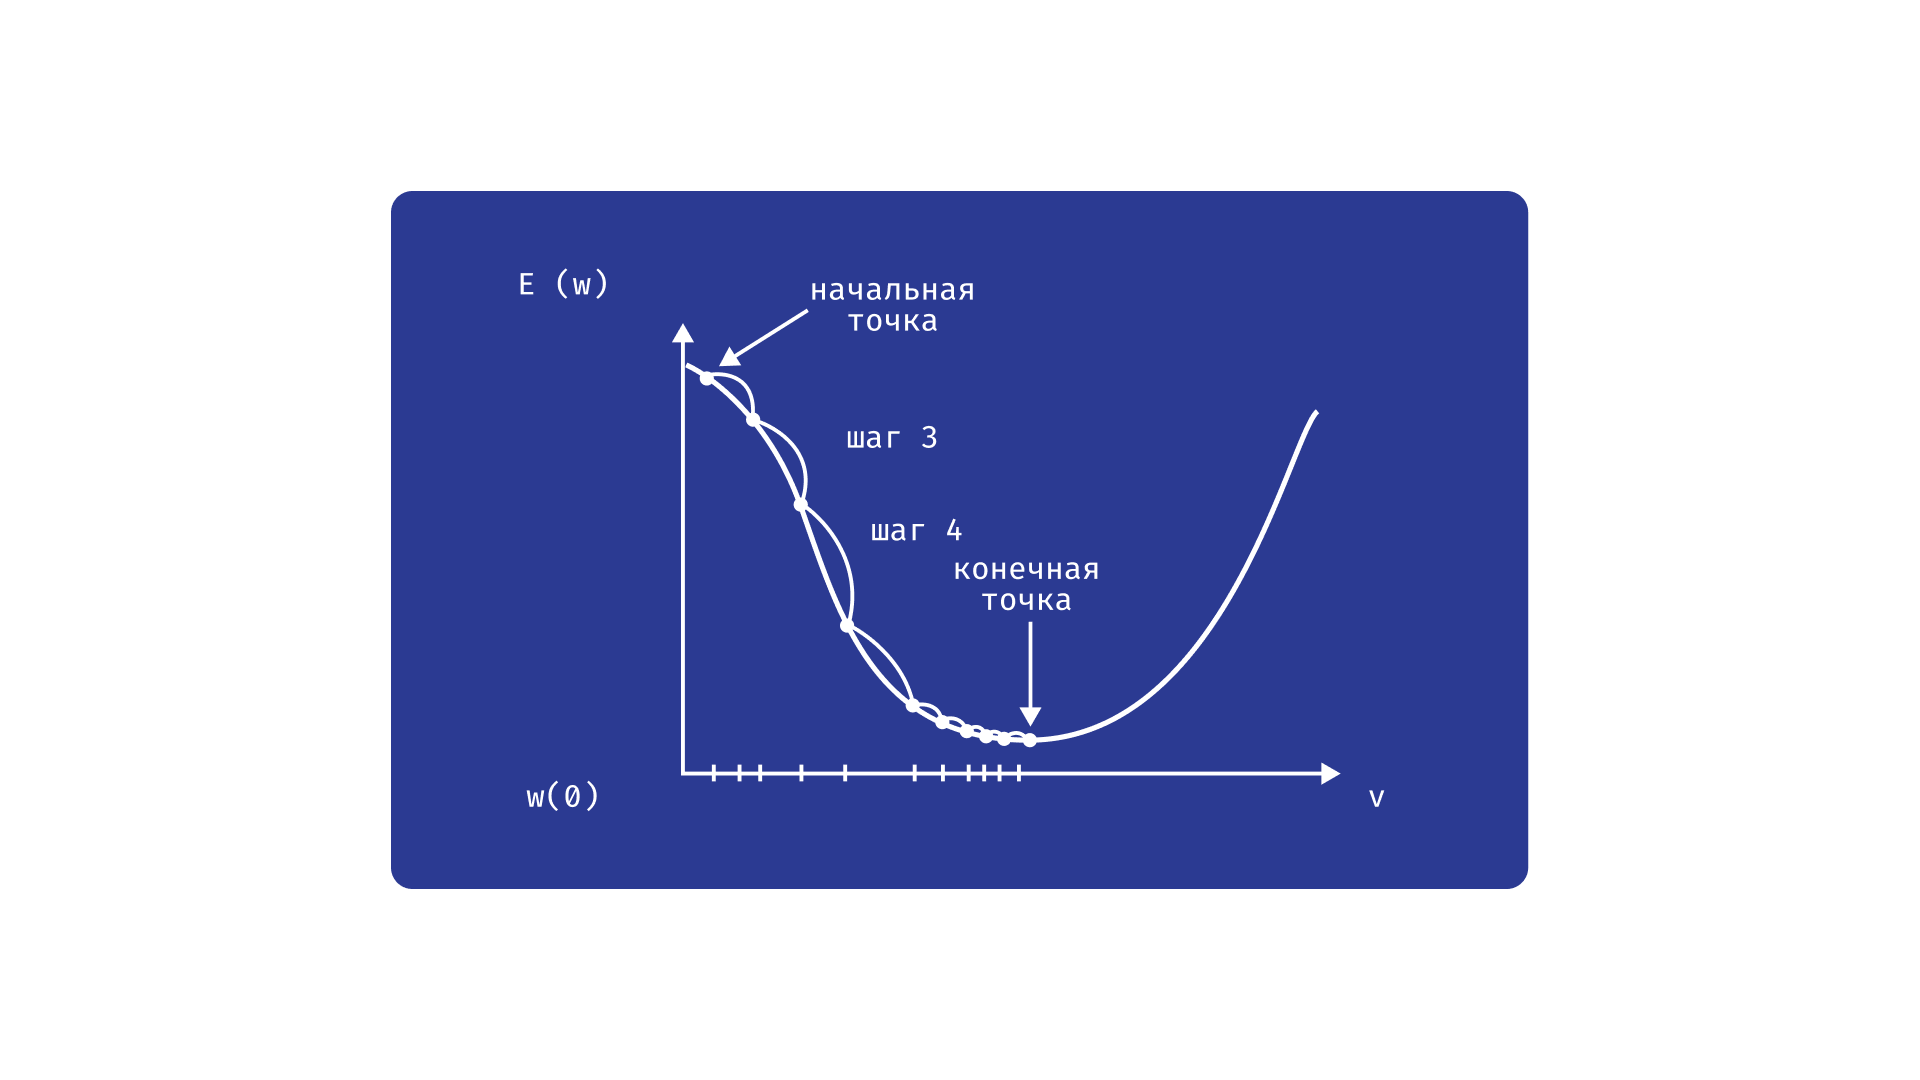

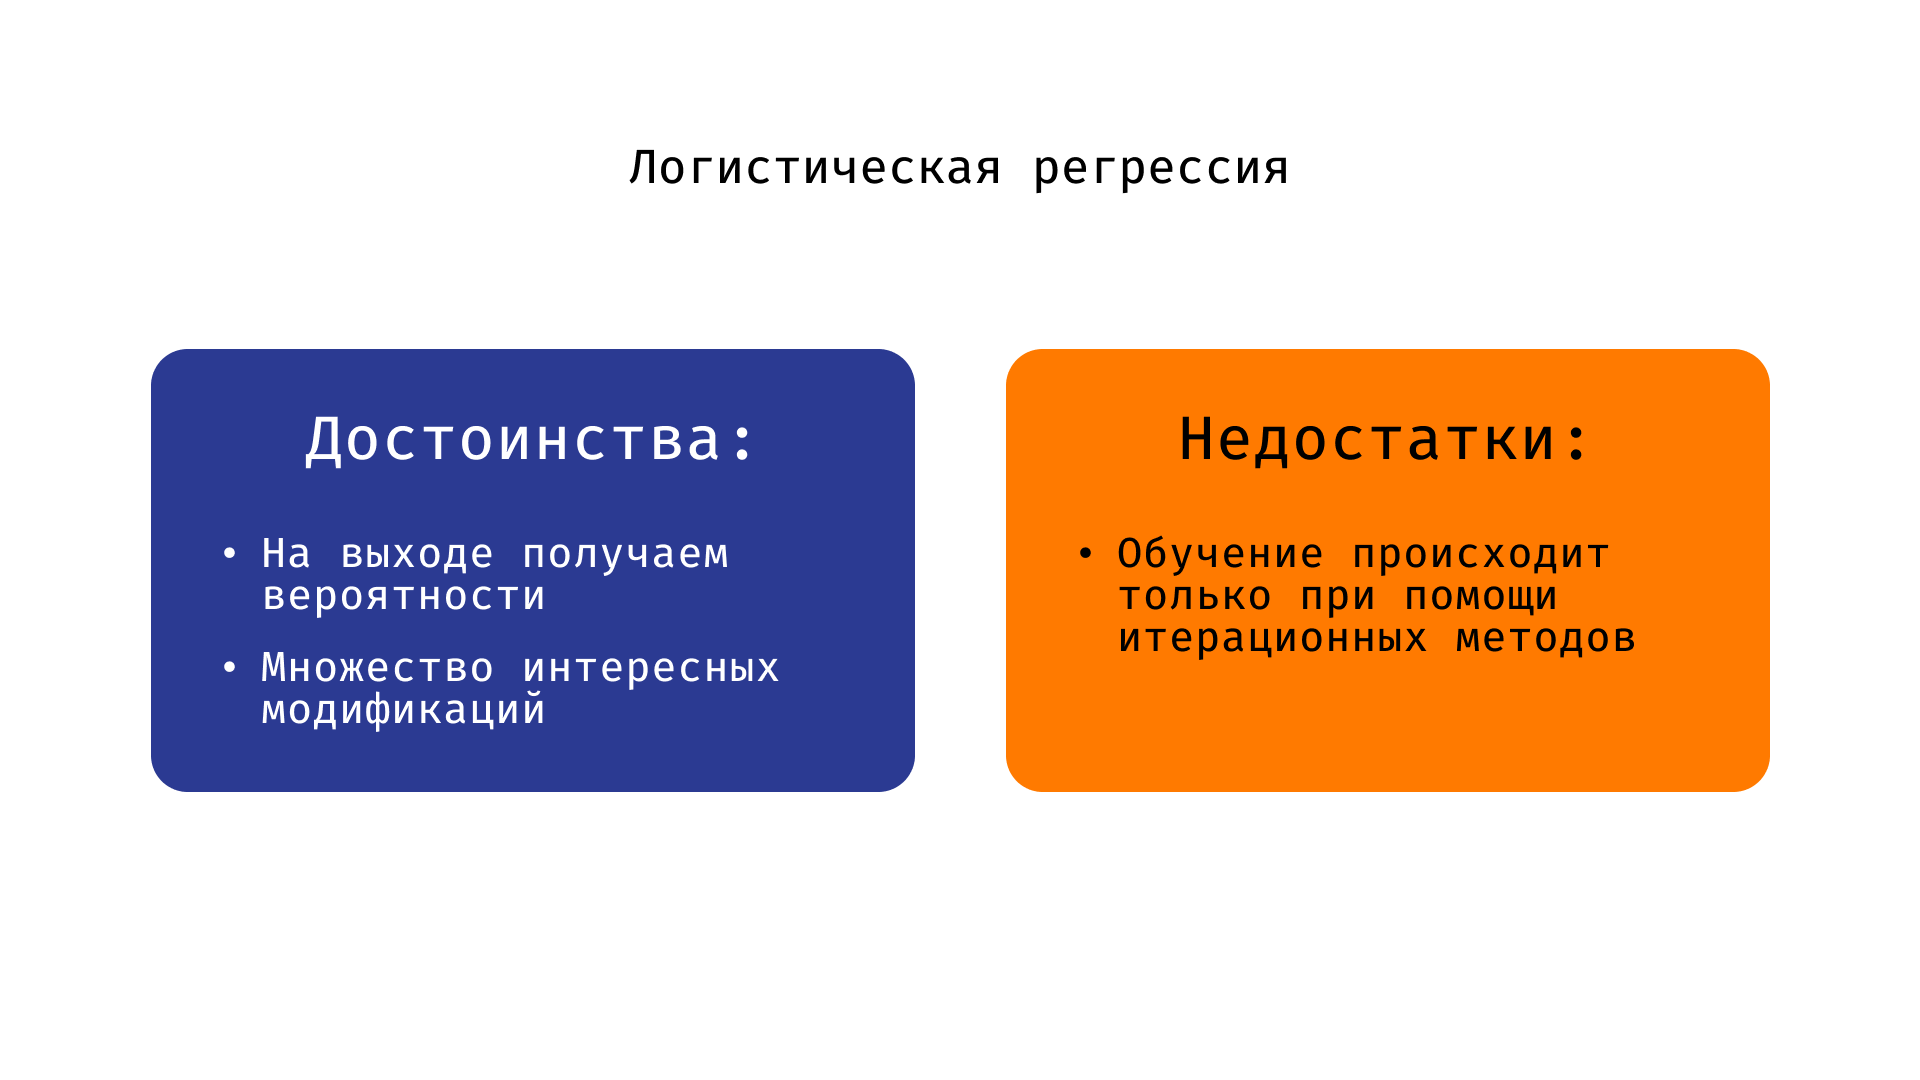

## Линейные модели регрессии



### Одномерный случай линейной регрессии.

Представьте, что вы - экспериментатор. Например, вы - физик или механик, который только что изобрел новый материал. Вы рады своему открытию, ожидаете множество премий и всемирного признания ваших достижений. Но прежде чем почивать на лаврах, вы должны представить миру результат своей работы, а значит и подробно описать свойства изобретенного вами материала.

Сегодня ваша задача - измерить коэффициент упругости этого материала. Вы, конечно, помните школьный закон Гука, связывающий приложенную силу и растяжение в случае одноосного эксперимента: $$F = k𝛥x$$
$k$ - тот самый коэффициент, который вы пытаетесь найти.

Казалось бы, все очень просто. Нужно всего лишь взять набор гирь известной массы и линейку, закрепить образец, начать вешать гири, а затем измерять получившееся удлинение $𝛥x$. Тогда, имея в распоряжении набор измерений, представляющих собой пары $({F_i}, {𝛥x_i})$, вы без труда найдете коэффициент $k = \frac{F_i}{𝛥x_i}$. Причем, согласно теории, вы можете взять любой $i$ (то есть любую пару измерений), а отношение от этого измениться не должно.

Это значит, что в теории $F$ зависит от $𝛥x$ **линейно**, то есть если вы нарисуете график этой зависимости, этот график будет просто прямой линией.


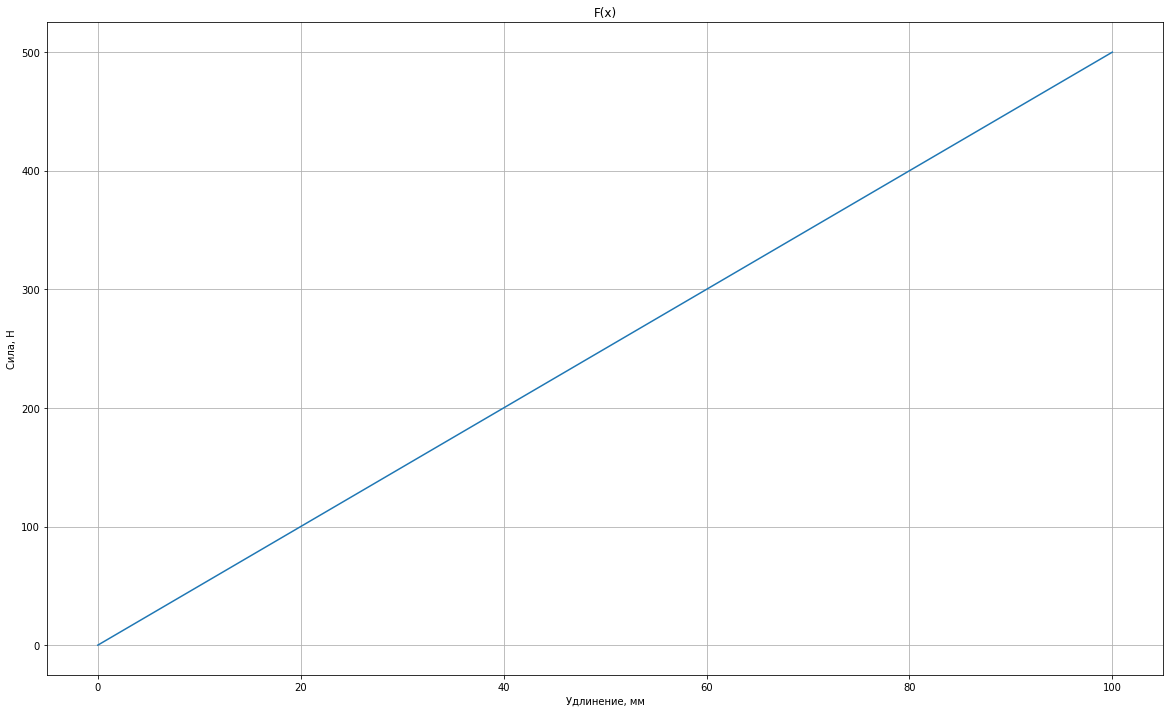

В реальности же все выйдет немного иначе. Здание, где вы проводите эксперимент, непременно будет находится недалеко от большого шоссе или подземной линии метро, может быть, поблизости будет аэропорт, или же просто на улице будет гроза. Внешнее влияние испортит, вибрации от всех этих раздражителей повлияют на чистоту эксперимента, и вы получите результат, немного отличный от ожидаемого. Пары точек $({F_i}, {𝛥x_i})$ не будут идеально лежать на прямой, вместо этого они будут как будто разбросаны вокруг нее.


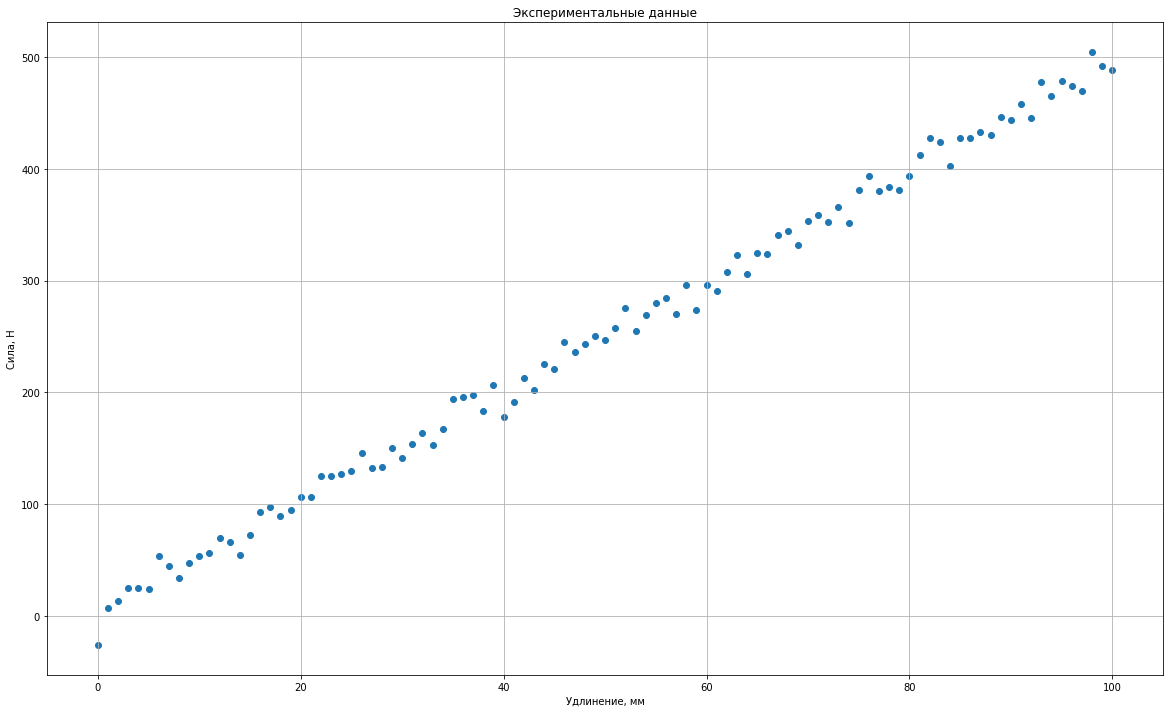

Как же вам понять, каков в действительности, хотя бы примерно, коэффициент упругости вашего материала? Ведь разные эксперименты дают совершенно разный результат.

Ответ состоит в том, что мы должны по последовательности наблюдений расшифровать скрытую в них линейную зависимость, построить аппроксимирующую прямую $$y = kx + b$$ (в случае закона Гука $b$=0), которая будет хорошо моделировать исходный закон природы.



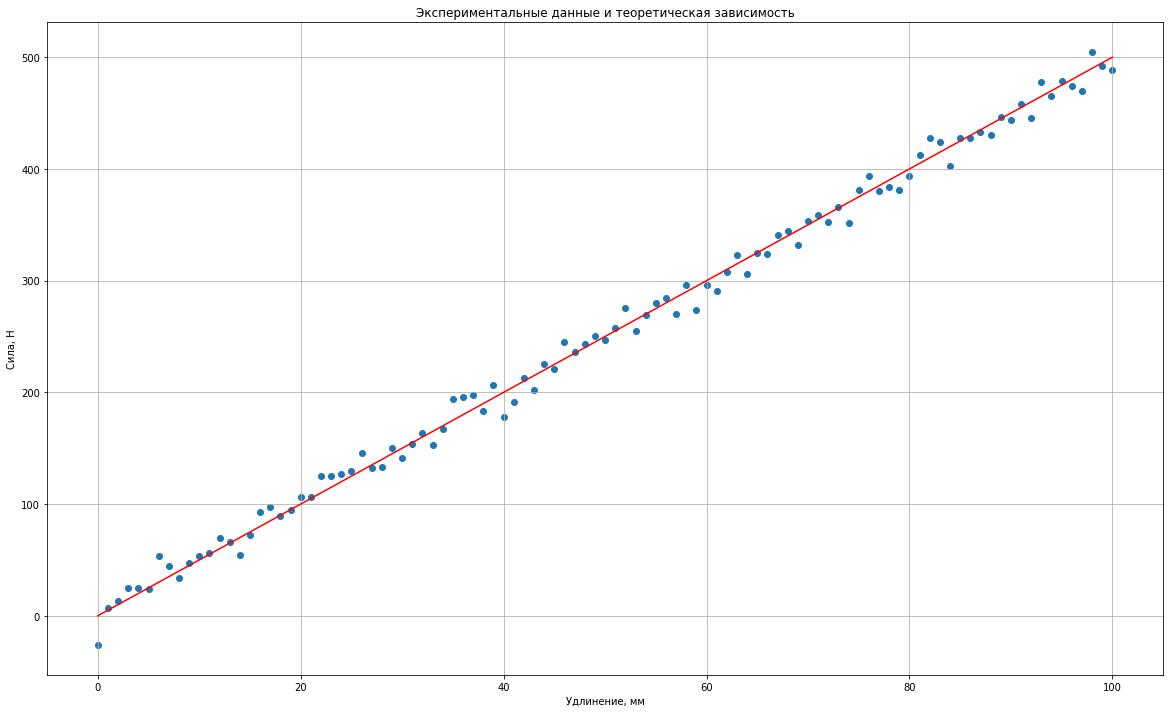

То есть задача вновь сводится к тому, что мы должны подобрать коэффициенты прямой $k$ и $b$ по нашей исходной размеченной выборке.

То есть наш алгоритм регрессии имеет вид $$a(x) = kx + b$$

### Что делать, когда признаков много (>1)?

Сейчас мы рассмотрим случай, когда требуется предсказать лишь одно свойство, но предсказание требуется сделать основываясь на $m-1$ разных признаках. То есть пространство, в котором мы работаем $m$-мерно ($m-1$ признак и $1$ свойство, которое мы хотим предсказать).

Например свойством объекта "яблоко" может быть его цена на ближайшем рынке, в то время как признаками, описывающими это яблоко, будут, скажем, его размер и зрелость. Если и от зрелости, и от размера по отдельности цена яблока будет зависеть линейно, то в этом пространстве будет существовать линейная гиперплоскость, каждая точка которой отвечает тройке (зрелость-размер-цена), и, зная размер и зрелость, мы можем однозначно предсказать цену.

В общем случае, предсказываемых свойств может быть больше.

Как мы обсуждали в прошлый раз, линейные поверхности могут быть представлены в многомерном пространстве как множество точек, удовлетворяющих [уравнению](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=12kOQH14arDC): $$f_w(x) = \sum\limits_{i=1}^{m-1}{x_i}{w_i} + {w_0} = (\vec{x}, \vec{w}) + {w_0} = 0$$

В этом случае, алгоритм линейной регрессии обобщается на многомерную плоскость следующем образом.

Пусть переменные $x_1 ... x_{m-1}$ обозначают признаковое описание объекта в $(m-1)$-мерном пространстве, а координата $m$ - прогнозируемую переменную. Тогда уравнение можно переписать следующим образом: $$x_{m} = -\frac{w_1}{w_m}{x_1} -\frac{w_2}{w_m}{x_2} - ... -\frac{w_{m-1}}{w_m}{x_{m-1}} - \frac{w_{0}}{w_m}$$

Ради удобства проведем следующее переименование: $$ \alpha_i := -\frac{w_{i}}{w_m}$$

Тогда значение искомой переменной $x_m$ можно выразить, как функцию от $x_1 ... x_{m-1}$ и вектора параметров $\vec{\alpha}$ $$x_m(x_1 ... x_{m-1}, \vec{\alpha}) = \alpha_1x_1 + ... + \alpha_{m-1}x_{m-1} + \alpha_0$$

И тогда при известном [векторе](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=pcSZI4RdFton) $\vec{\alpha}$ алгоритм линейной регрессии можно записать следующим образом:
$$a(\vec{x}) = {x_m(x_1 ... x_{m-1})}= \sum\limits_{i = 1}^{m-1}\alpha_ix_i + \alpha_0$$

За $a(x)$ здесь обозначено предсказание нашей модели, которое геометрически представляет собой значение $n$-й координаты точки гиперплоскости $x_m$.


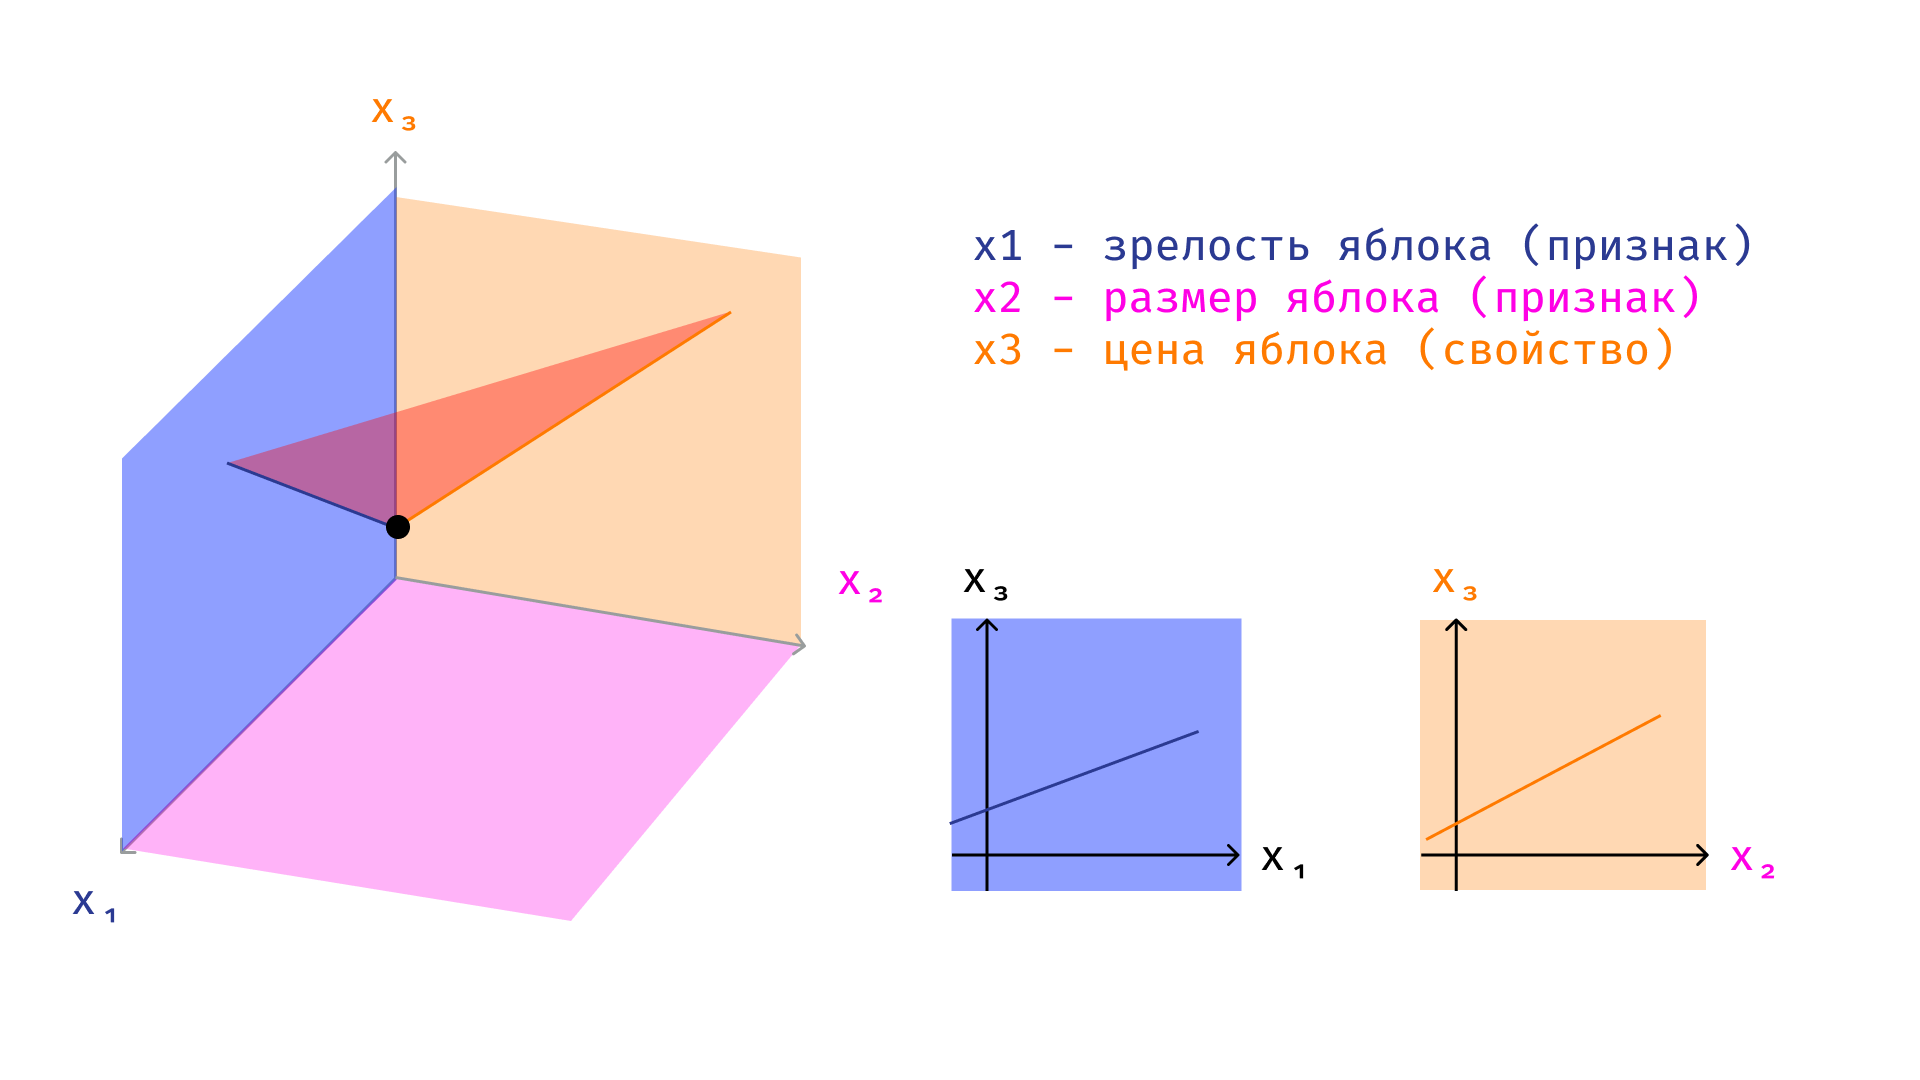

In [15]:
import plotly
import plotly.graph_objects as go
import numpy as np

# Генерация массивов x и y
apple_maturity = np.outer(np.linspace(0, 1, 30), np.ones(30))
apple_size = apple_maturity.copy().T

# Расчет стоимости яблок
apple_cost = apple_maturity + 3 * apple_size + 1
normalized_apple_cost = apple_cost / 2

# Настройка осей графика
layout = go.Layout(
    scene={
        "xaxis": {"title": "Зрелость яблока"},
        "yaxis": {"title": "Размер яблока"},
        "zaxis": {"title": "Стоимость яблока"},
    }
)

# Создание графика поверхности
figure = go.Figure(data=[go.Surface(x=apple_maturity, y=apple_size, z=normalized_apple_cost)], layout=layout)
figure.show()


### Матричная запись

_______________________________________
Ради удобства записи выполним следующий маневр:
дополним вектор $\vec{x}$ еще одной координатой, которой присвоим значение $1$.

В этом случае вектор $\vec{x}$ = ($x_1, ..., x_{m-1}, 1$)

А вектор $\vec{\alpha}$ заменим на вектор $(\alpha_1, ..., \alpha_{m-1}, \alpha_0)$

Тогда [скалярное произведение](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=OXZed9NEynaD) $(\vec{x},\vec{\alpha}) =  \sum\limits_{i=1}^{m-1}\alpha_ix_i + \alpha_0 \cdot 1$, то есть наш алгоритм в таком случае примет вид $$a(\vec{x}) = (\vec{x},\vec{\alpha}) $$

В дальнейшем будем писать именно так.
_______________________________________
Пусть $X =\{x_{ij}\}$ - [матрица](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=heGITlnw8FKh), элемент которой $x_{ij}$ представляет собой $j$-й признак $i$-го объекта размерности $N \times M$. Такая матрица $X$ называется матрицей объектов-признаков.

$N$ в данном случае - количество объектов в выборке, а $M$ - число признаков, которыми описывается каждый из объектов.

Для того чтобы получить предсказание модели для $i$-го объекта, необходимо [умножить](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=lK00bznNIOP9) $i$-ю строчку этой матрицы на вектор параметров $\vec{α}$.

В этом случае матричное произведение $X\vec{\alpha}:T$ определяет вектор предсказаний модели: $$a(X) = X\vec{\alpha}^T \in R^N$$

Здесь $\vec{α}^T$ - транспонирование вектора $\vec{α}$, то есть превращение его из вектора-строки в вектор-столбец.



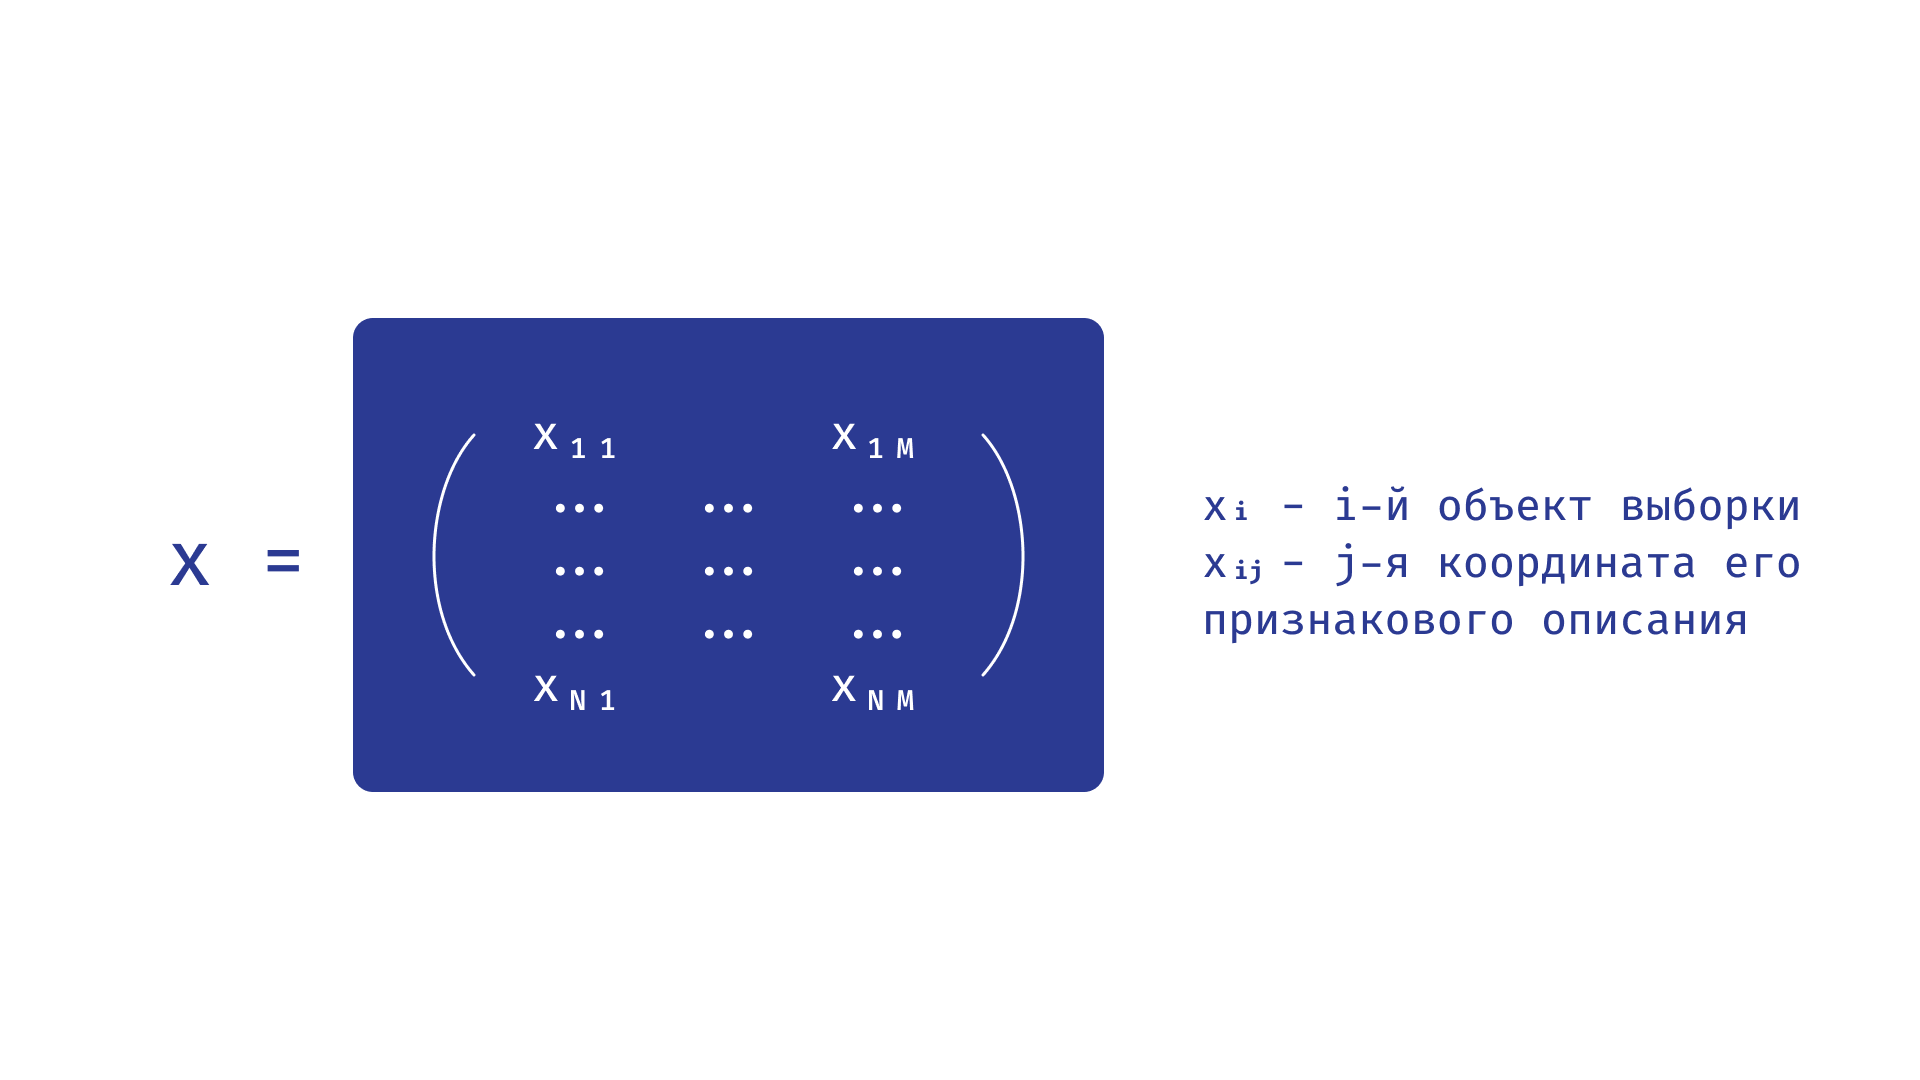

### Подбор параметров

Каким образом мы будем выбирать наилучшие параметры для предсказательной модели?

Как всегда для понимания стратегии поиска наилучших параметров, нам нужно понять, какие вообще параметры считаем наилучшими. Или, выражаясь в терминах машинного обучения, подобрать Loss-функцию, которую мы будем оптимизировать.

Обратимся к одномерному случаю. Пусть для объекта $x$ предсказание нашей модели $a(x)$, а настоящее значение переменной, которое мы должны были найти, - это $y$.

Ошибка алгоритма $a$ на объекте $x$ в этом случае может быть представлена в виде модуля или квадрата разности $|a(\vec{x}) - \vec{y}|$ или $(a(\vec{x}) - y)^2$. В этом случае функция **эмпирического риска** (то есть функция, наименьшее значения которой мы хотим найти, демонстрирующая совокупную ошибку алгоритма $a$ на всем датасете $X$) может быть записана в виде $$Q(a, X) = \frac{1}{N}∑(a(x_i) - y_i)^2$$ или $$Q(a, X) = \frac{1}{N}∑|a(x_i) - y_i|$$

Мы уже сталкивались с такой функцией, когда рассматривали решение задачи регрессии при помощи метрических классификаторов.

Простыми словами минимизация $Q(a,X)$ - это поиск такого вектора параметров алгоритма $\vec{\alpha_{опт}}$, при котором средняя ошибка нашего предсказания будет **минимальной**.

Здесь мы работаем с **квадратичной функцией**. Это значит, что ее минимум мы можем найти простыми школьными методами, продифференцировав $Q$ по $\vec{\alpha}$ и приравняв производную к 0

В одномерном случае:

$$a(x) = α_1x + {\alpha}_0$$

$$Q(a,x) = \frac{1}{N}((\alpha_1x_1 + \alpha_0 - y_1)^2 + ... + (\alpha_1x_N + \alpha_0 - y_N)^2)$$

Тогда, [продифференцировав](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1m66zhVnUv9w) последнее выражение, получим:
$$\frac{∂Q(α_1, \alpha_2, x)}{∂α_1} = \frac{1}{N}(2x_1(\alpha_1x_1 + \alpha_0 - y_1) + ... + 2x_N(\alpha_1x_N + \alpha_0 - y_N)) (1)$$

$$\frac{∂Q(α_1, \alpha_2,x)}{∂α_0} = \frac{1}{N}(2(\alpha_1x_1 + \alpha_0 - y_1) + ... + 2(\alpha_1x_N + \alpha_0 - y_N)) (2)$$

Приравняв $(1)$ и $(2)$ к нулю и решив систему из двух линейных уравнений с двумя переменными, получаем точное аналитическое решение.

$$\frac{\partial Q}{\partial α_1} = 2((α_1x_1 + α_0) - y_1)x_1 + ... + 2((α_1x_n + α_0) - y_N)x_N = 0$$

$$\frac{\partial Q}{\partial α_0} = 2(\alpha_1x_1 + \alpha_0 - y_1) + ... + 2(\alpha_1x_N + \alpha_0 - y_N) = 0$$

Тогда

$$α_1(x_1^2 + ... + x_N^2) = x_1y_1 + ... + x_Ny_N - α_0(x_1 + ... + x_N)$$

$$α_1(x_1 + ... + x_N) = y_1 + ... + y_N - Nα_0$$

Отсюда

$$\alpha_0 = \frac{y_1 + ... + y_N - \alpha_1(x_1 + ... + x_N)}{N}$$

$$\alpha_1 = \frac{x_1y_1 + ... + x_Ny_N - \frac{1}{N}(y1 + ... + y_N)(x1 + ... + x_N)}{x_1^2 + ... + x_N^2 - \frac{1}{N}(x_1 + ... + x_N)^2}$$


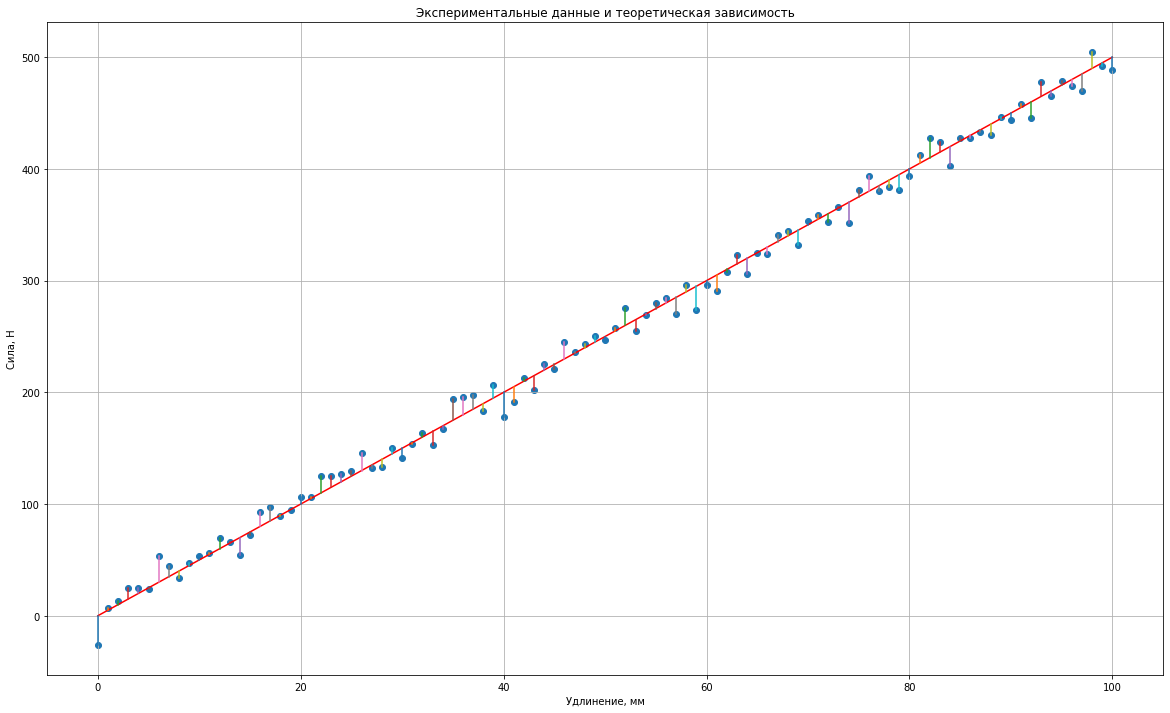

## Метод наименьших квадратов

Метод, описанный выше, называется методом наименьших квадратов (МНК). Причина такого названия очевидна.

Но почему мы отдаем предпочтение минимизации квадратов, а не модулей?
Все дело в том, что принципиальной разницы, что из этого минимизировать, нет. Но у минимизации среднего квадрата отклонения есть несколько преимуществ: в отличие от суммы квадратов модулей, он везде дифференцируем, его производная удобно записывается. Средний квадрат ошибки в пространстве параметров задает поверхность [парабаллоида вращения](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=Ff1UdxhpPMaA), в то время как средний модуль - поверхность [конуса](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=7jfOrcDlNhb0). В вычислительной математике обычно отдают предпочтение именно квадратичной, а не модульной функции (хотя мы увидим, что бывают не столь редкие исключения).

**МНК можно распространить на случай признакового описания большей размерности.**

В многомерном случае те же выражения можно записать в [матричном](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=heGITlnw8FKh) виде.
Предсказание модели с [вектором](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=pcSZI4RdFton) параметров $\vec{\alpha}$ для матрицы объектов-признаков $X$ получается простым [матричным перемножением](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=lK00bznNIOP9) $a(X) = X\vec{\alpha}^T$.

Если мы знаем вектор верных ответов $\vec{y} = (y_1 ... y_n)^T$, то совокупную ошибку по датасету можно выразить следующим образом:

$$Q(\vec{α}, X, y) = \frac{1}{N}∑\limits_{i=1}^N((\vec{x}_i,\vec{α}) - y_i)^2$$

Или то же самое можно записать через **[норму](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=BQYo5PC3B_jZ)** (обобщение понятия длины) вектора отклонений предсказаний от верных ответов:

$$Q(\vec{α}, X, y) = \frac{1}{N}||X\vec{α}^T - \vec{y}||_2^2$$

В векторном случае:
$$||\vec{a}||_2 = \sqrt{a_1^2 + ... + a_n^2}$$

Эту функцию мы собираемся минимизировать по вектору параметров $\vec{α}$.

## Замечание*
______________________________
В самом общем случае мы можем делать предсказания нескольких свойств. Тогда нам нужно сделать следующие преобразования.

Теперь $y_i$  может быть вектором любой размерности $K$. Это вектор всех тех свойств, которые мы **хотим предсказать**. $K$ - это количество таких свойств.
Количество таких векторов - это количество объектов в нашей выборке. Совокупность векторов $y_i$ задаст нам [матрицу](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=heGITlnw8FKh) верных ответов $Y$ размерности $N × K$.

Соответственно $x_i$ - это вектор, содержащий признаковое описание объекта, его размерность вообще говоря не совпадает с размерностью $y_i$

Вектор $\vec{α}$ превратится в матрицу параметров $A$ размерности $M × K$.

Функция ошибки останется практически неизменной в такой записи:
$$Q(A, X, y) = \frac{1}{N}\frac{1}{K}∑\limits_{i=1}^K∑\limits_{j=1}^N((\vec{x}_j, A_i^T) - Y_{ji})^2$$
______________________________


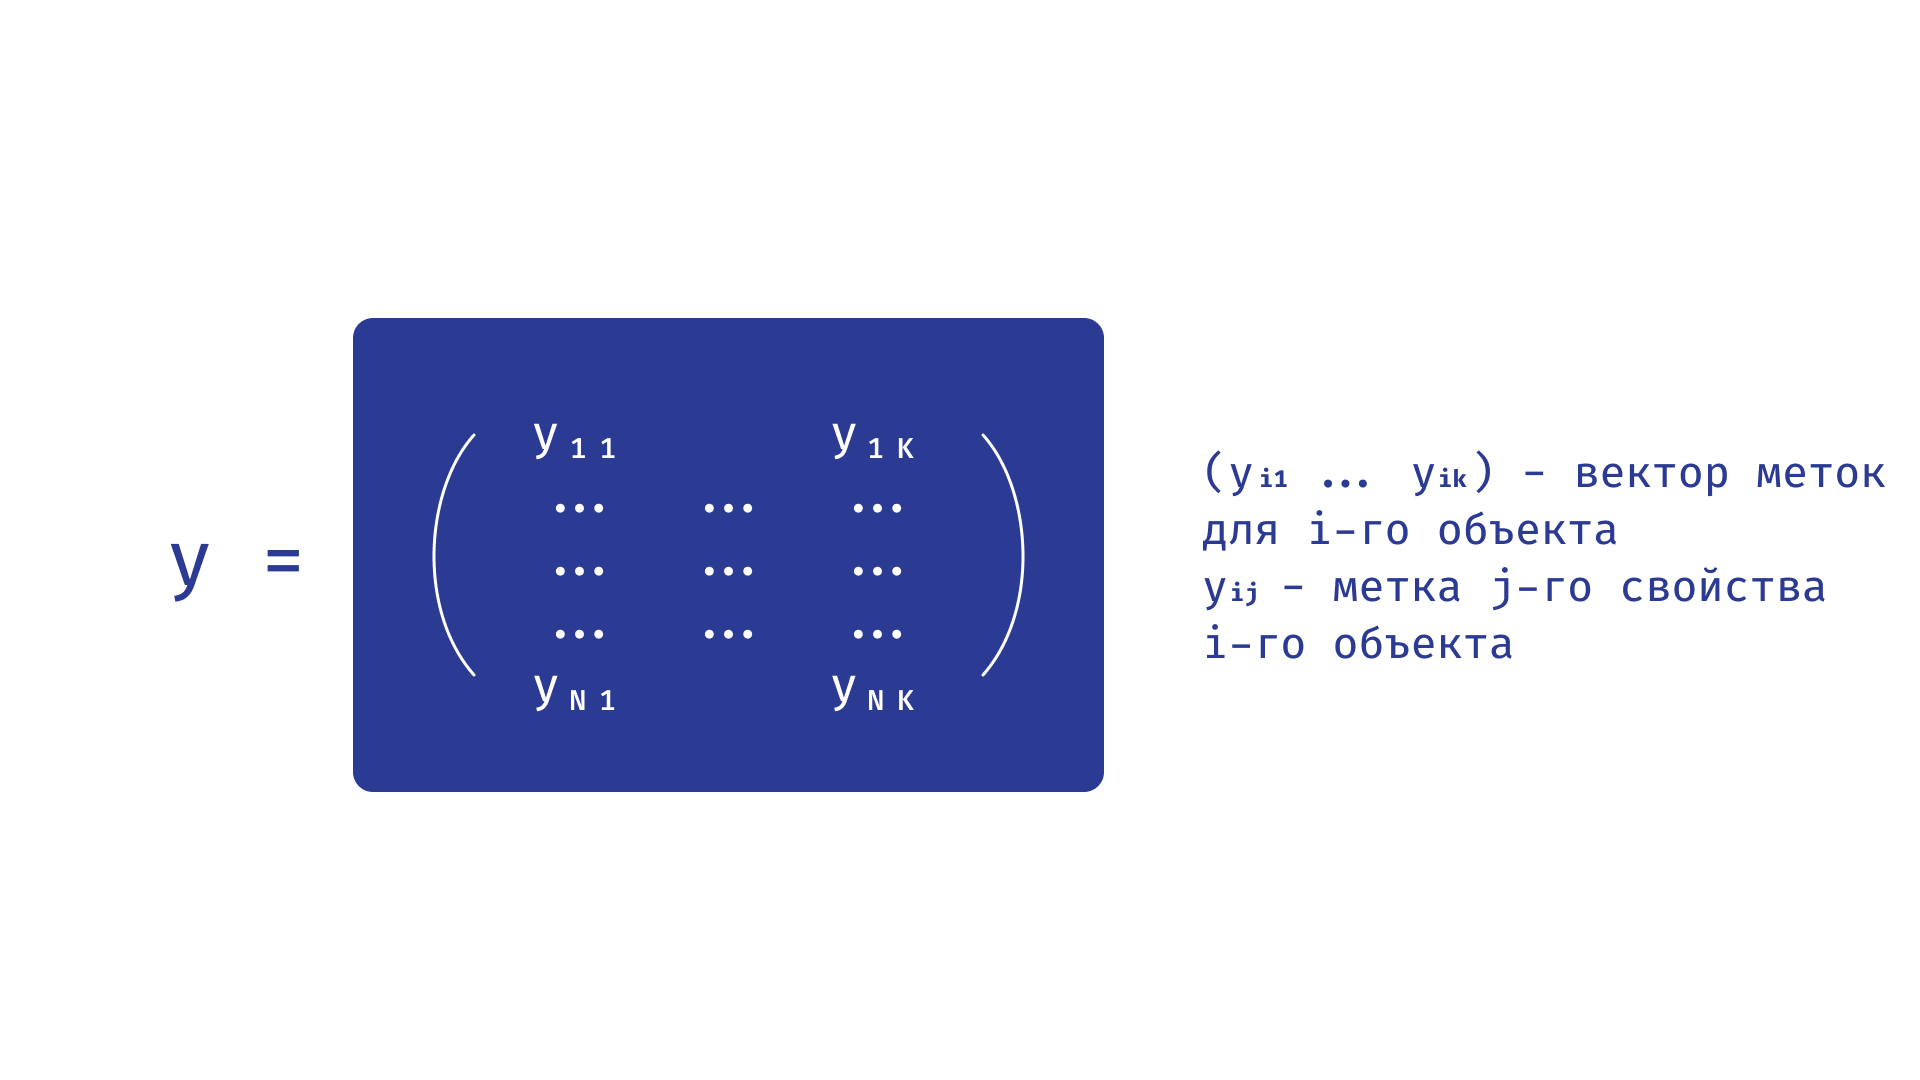

### Решение многомерного МНК

Для нахождения экстремума необходимо [продифференцировать](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1m66zhVnUv9w) $Q$ по $α$ и приравнять производную к 0. Найденный экстремум обязательно будет минимумом функции, так как функция квадратичная, выпуклая вниз.

Правила линейной алгебры учат нас, что $\frac{∂Q(\vec{α}, \vec{x})}{∂\vec{α}} = 2X^T(X\vec{α}^T - \vec{y}) = 0$

Решение этого матричного уравнения находится при помощи последовательности несложных [преобразований](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=BTk1TQ82_qbg):

$$X^TX\vec{α}^T = X^T\vec{y}$$
$$\vec{α}^T_{опт} = (X^TX)^{-1}X^T\vec{y}$$

Итак, мы нашли аналитическое решение, выразив вектор оптимальных параметров $\vec{α}_{опт}$

Тут возникает проблема численной реализации такого алгоритма поиска параметров: мы видим, что в формуле присутствует обращение ([транспонирование](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=8EIzs6mFVbt6) и [перемножение двух матриц](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=RJE2i2Z8V5mN)) матрицы $X^TX$. Эта операция вычислительно сложная, и накладывает определенные требования на матрицу $X$, которым она, вообще говоря, может и не удовлетворять. Часто вместо такого метода поиска точного минимума функции $Q$ на практике используют метод градиентного спуска.

## Дополнения
__________________________________

### Производные $\frac{\partial H}{\partial \omega_i}$

В рамках алгоритма градиентного спуска нам необходимо посчитать [производные](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1m66zhVnUv9w) функции бинарной кросс-энтропии по параметрам модели, чтобы делать шаги градиентного спуска.

Покажем, как можно посчитать эту производную.

Рассмотрим случай, когда нам необходимо посчитать производные всего для одного примера. То есть мы имеем единственный объект $x$ с истинной меткой $y$ и гипотезой нашего алгоритма $p$. Тогда $$H(p, y) = - (y \cdot ln(p) +(1 - y) \cdot ln(1-p))$$

Причем $p = σ(ω_1 \cdot x_1 + ... + ω_{n} \cdot x_n + ω_0 ⋅ 1)$

Вспомним простое правило из математического анализа о вычисленнии [производной сложной функции](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=qny-9SFZUibG):

$$\frac{∂ H}{∂ ω_i} = \frac{∂ H}{∂ p} \cdot \frac{∂ p}{∂ ω_i}$$
Посчитаем первое и второе слагаемое по отдельности.
- $\frac{∂ H}{∂ p} = -y ⋅ \frac{1}{p} + (1-y) \cdot \frac{1}{1 - p}$

Вспомним одно из основных свойств сигмоидальной функции (его доказательство - полезное упражнение, рекомендуется выполнить его самостоятельно):
$σ' = σ \cdot (1 - σ)$
- $\frac{∂ p}{∂ ω_i} = p⋅(1 - p)⋅x_i$, если $i \neq 0$
- $\frac{∂ p}{∂ ω_0} = p⋅(1 - p)$

Введём обозначение $x_0 ≡ 1$

Тогда оба равенства можно записать $\frac{∂ p}{∂ ω_i} = p⋅(1 - p)⋅x_i$

Перемножим полученные результаты:

$$\frac{∂ H}{∂ ω_i} = p⋅(1 - p)⋅x_i ⋅ (-y ⋅ \frac{1}{p} + (1-y) \cdot \frac{1}{1 - p}) = x_i((1 - y)⋅p - y⋅(1-p))$$

---------------------------

### Scaling

Необходимость шкалирования (приведения признаков к единой шкале) в рамках предобработки данных - известная особенность линейных (да и многих других) моделей машинного обучения.

Вспомним, что любая линейная модель представляет из себя в общем случае [функцию](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=dbrEUiDnQeXA) вида:

$$f(x_1ω_1 + ... + x_nω_n + ω_0)$$

В этом случае крайне важно следующее соображение:

Если признаки $x_1 ... x_n$ представляют из себя переменные разного масштаба (например, характерное значение $x_1$ ~ $1$, в то время как $x_2$ ~ $1000$), то малые изменения признаков с большим масштабам приведут к ощутимым изменениям результата, в то время как даже довольно существенные изменения признаков маленького масштаба к таким изменениям почти не приведут.

Вы, конечно, можете сказать, что в теории добиться баланса можно как раз за счёт аккуратного выбора коэффициентов $\omega_1 ... ω_n$, которые могут уравновесить этот дисбаланс. Да, в теории могут, но на практике эта ситуация практически недостижима. И чем меньше размер нашей выборки, тем менее вероятна эта ситуация. Алгоритму требуется наша помощь для решения указанной проблемы.

Ещё более явно эта проблема встает перед нами, когда мы говорим о метрических методах. Представим, что мы работаем с двумерным пространством, то есть с объектами, [векторное](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=pcSZI4RdFton) описание которых имеет вид $\vec{x} = (x_1, x_2)$. Пусть $x_1$ ~ $1$, а $x_2$ ~ $1000$. Рассмотрим 3 объекта:

$$\vec{x_1} =(1, 1000)$$
$$\vec{x_2} = (0.01, 1000)$$
$$\vec{x_3} = (1, 1010)$$

В данном случае с точки зрения большинства рассмотренных нами метрик [расстояние](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=BQYo5PC3B_jZ) между $\vec{x_1}$ и $\vec{x_2}$ будет меньше, чем между $\vec{x_1}$ и $\vec{x_3}$, ведь основной вклад в расстояние вносит именно вторая координата. Но мы видим, что относительное изменение первой координаты при переходе от $\vec{x_1}$ к $\vec{x_2}$ намного больше, чем относительное изменение второй координаты при переходе от $\vec{x_1}$ к $\vec{x_3}$. Этот факт может свидетельствовать о том, что отличия между первым и вторым объектом в реальности намного больше, чем между первым и третьим, то есть алгоритм вводит нас в заблуждение.

Например, если первая координата описывает вероятность крушения самолёта в случае удара в него молнии, а вторая - максимальную дальность полёта, очевидно, что настолько существенные отличия в первой координате будут значить для нас намного больше, чем столь несущественные отличия во второй. Любой метрический алгоритм не сможет этого учесть.

Итак, мы пришли к выводу о необходимости приведения всех признаков к единой шкале. Существует довольно много способов сделать это. Мы рассмотрим наиболее распространенный метод.

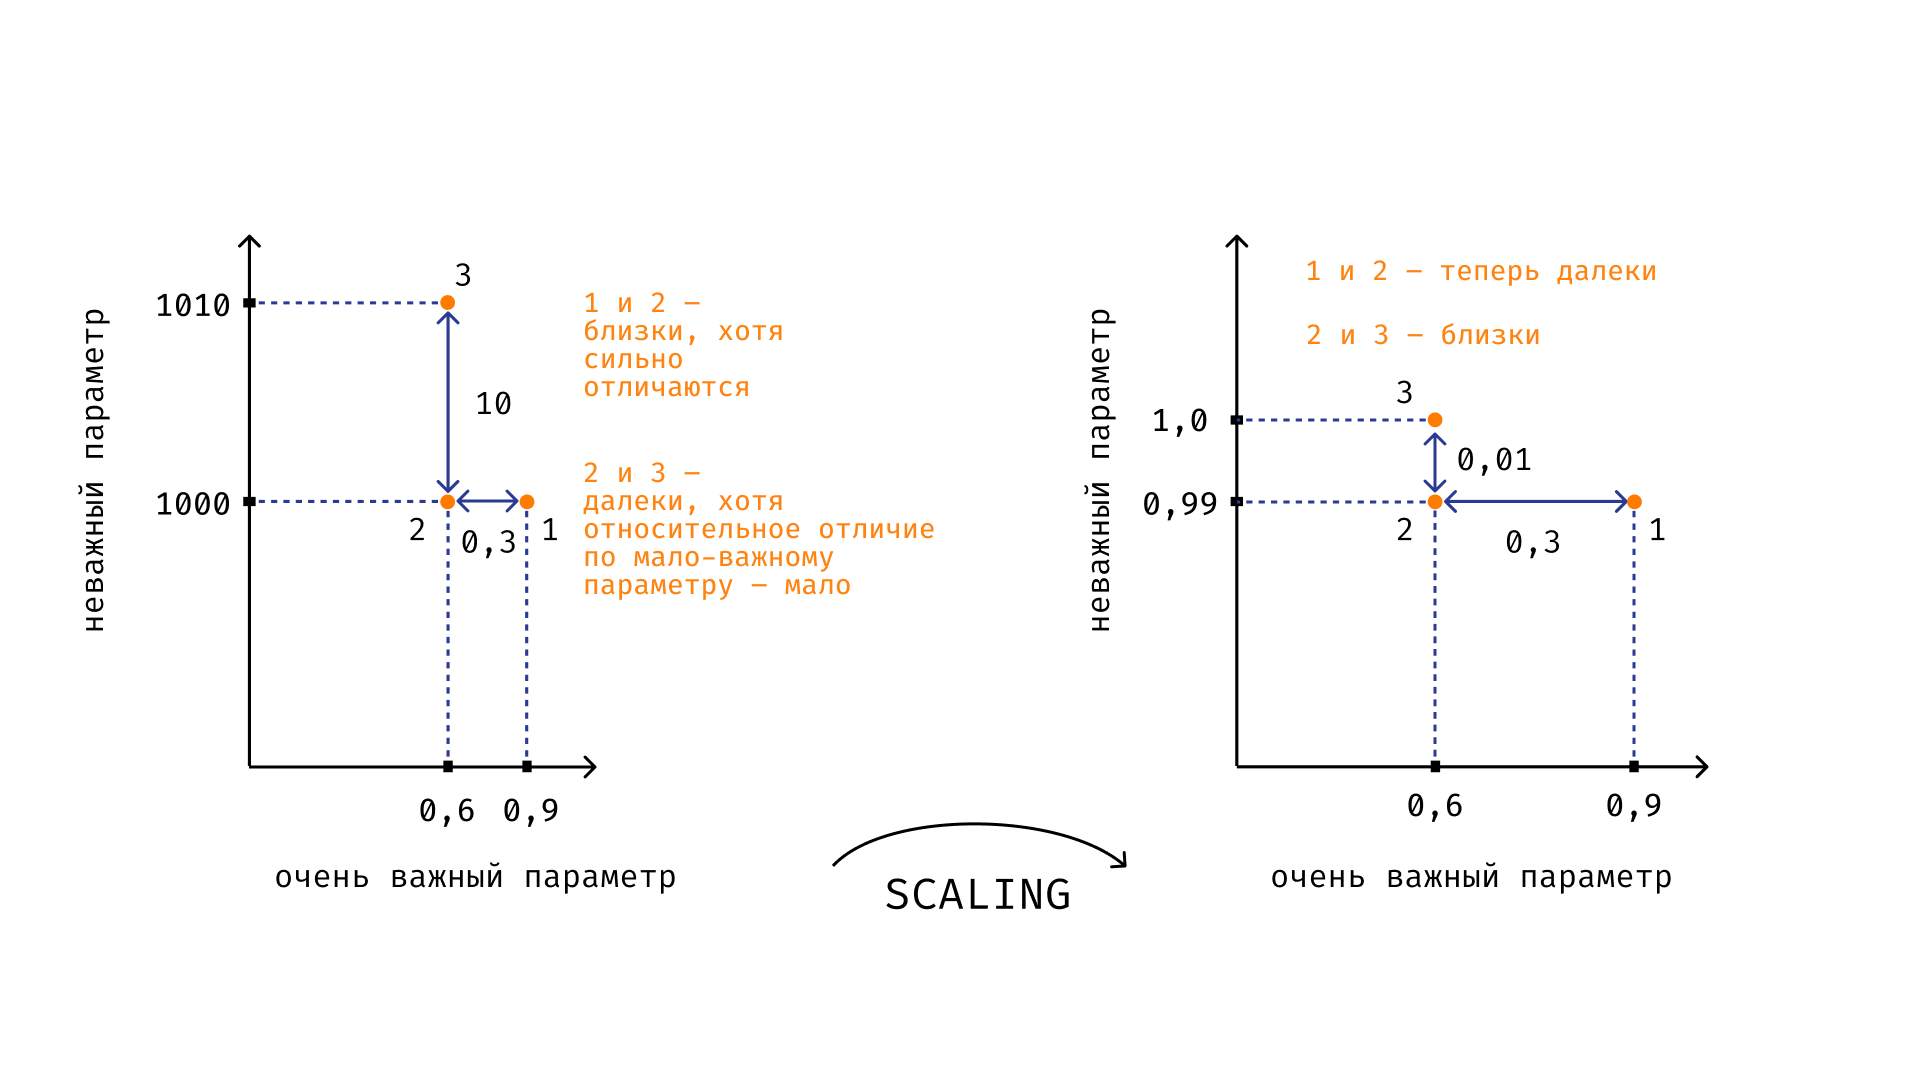

В **лекции 2** мы уже рассматривали один из способов приведения выборок к единой шкале - StandardScaling.

---------------------------

### Метрики качества регрессии

Не вполне очевидным вопросом является оценка качества линейной (да и вообще любой) регрессии. Разебермся с некоторыми популярными метриками качества.



#### 1. Mean Absolute Error

Метрика $MAE$ представляет из себя оценку ожидаемого модуля отклонения предсказания модели от действительного значения. На выборке $X$ эту метрику можно посчитать по формуле

$$
MAE = \frac{1}{N}∑\limits_{x \in X}|a(x) - y_x|
$$

Значение этой метрики неотрицательно, и достигает нуля только в случае идеального предсказания модели на выборке $X$. Таким образом, $MAE$ - это метрика, которую требуется **минимизировать**.



#### 2. Mean Squared Error
Метрика $MSE$ представляет из себя оценку ожидаемого квадрата отклонения предсказания модели от действительного значения. В отличие от $MAE$, по $MSE$ удобно проводить оптимизацию при помощи градиентных методов. Из недостатков $MSE$ можно выделить тот факт, что значение $MSE$ может сбить с толку при невнимательном анализе, ведь ошибка предсказания здесь возводится в квадрат. То есть абсолютной ошибке =2, например, будет соответствовать среднеквадратичная ошибка =4.


$$
MSE = \frac{1}{N}∑\limits_{x \in X}(a(x) - y_x)^2
$$

Значение $MSE$ также неотрицательно и достигает нуля только в случае идеального предсказания модели на выборке $X$, а значит $MSE$ также необходимо **минимизировать**.



#### 3. Root Mean Squared Error

Простая модификация $MSE$, предназначенная для восстановления масштаба ошибки, утерянного при возведении в квадрат абсолютной ошибки в $MSE$:
$$
RMSE = \sqrt{\frac{1}{N}∑\limits_{x \in X}(a(x) - y_x)^2}
$$

In [ ]:
import numpy as np

def mae(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Вычисляет среднюю абсолютную ошибку между истинными и предсказанными значениями.

    Parameters:
    - y_true: np.ndarray, истинные значения.
    - y_pred: np.ndarray, предсказанные значения.

    Returns:
    - mean_abs_err: float, средняя абсолютная ошибка.
    """
    err = np.abs(y_true - y_pred)
    mean_abs_err = np.mean(err)
    return mean_abs_err

def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Вычисляет среднеквадратичную ошибку между истинными и предсказанными значениями.

    Parameters:
    - y_true: np.ndarray, истинные значения.
    - y_pred: np.ndarray, предсказанные значения.

    Returns:
    - mean_s_err: float, среднеквадратичная ошибка.
    """
    s_err = (y_true - y_pred) ** 2
    mean_s_err = np.mean(s_err)
    return mean_s_err

def rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Вычисляет квадратный корень из среднеквадратичной ошибки между истинными и предсказанными значениями.

    Parameters:
    - y_true: np.ndarray, истинные значения.
    - y_pred: np.ndarray, предсказанные значения.

    Returns:
    - root_mse: float, квадратный корень из среднеквадратичной ошибки.
    """
    mean_s_err = mse(y_true, y_pred)
    root_mse = np.sqrt(mean_s_err)
    return root_mse


------------------------

###  Пример

#### Классификация рукописных цифр

Одна из самых старых и проработанных задач машинного обучения - это задача распознавания рукописных цифр. Эта задача относится к задачам многоклассовой классификации. Входные данные представляют из себя изображения рукописных цифр, представленных в виде двумерного массива, содержащего в себе интенсивности каждого из пикселей. В классическом датасете MNIST эти изображения имеют размер $8 × 8$.

Мы можем загрузить MNIST, воспользовавшись функцией `load_digits` из `sklearn`.

In [3]:
from sklearn.datasets import load_digits
mnist = load_digits()
# mnist

Подгруженная структура имеет тип данных - словарь. Этот словарь содержит множество полей, в которых можно найти описание содержащихся в нём данных

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Как мы видим, картинки представленны именно в виде массива. Мы можем воспользоваться библиотекой `matplotlib` чтобы получить изображения по заданному массиву интенсивностей

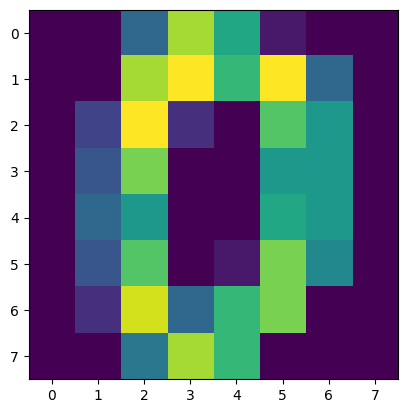

In [7]:
import matplotlib.pyplot as plt
plt.imshow(mnist.images[0])

Намного проще работать с данными в привычном представлении, поэтому получим их при помощи аргумента `return_X_y`. В позиции `True` он инициирует получение данных в стандартизированном виде.

In [8]:
X, y = load_digits(return_X_y=True)

Воспользуемся логистической регрессией, реализованной в модуле `sklearn.linear_model` при помощи класса `LogisticRegression`

Выполним следующие преобразованиями с данными:

* Разделим выборку на `train` и `test`
* Преобразуем `train` и `test` при помощи `StandardScaler`
* Обучим логистическую регрессию

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Разбиение данных на обучающую и тестовую выборки
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.1, shuffle=True)

# Предобработка данных: масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_set)
X_test_scaled = scaler.transform(X_test_set)

# Обучение логистической регрессии
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train_set)


LogisticRegression()

Теперь оценим качество классификации. Все классификаторы в `sklearn` имеют специальную функцию для оценки качества `.score(x_test, y_test)`. В базовом случае качество оценивается при помощи `accuracy_score`

In [ ]:
score = logistic_regression.score(X_test_scaled, y_test_set)
score

0.9722222222222222